## <b> IT Salary Survey - Data Cleaning </b>

### <b> Importing Libraries </b>

In [4501]:
import pandas as pd
import numpy as np
import missingno as mano
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


#### <b> Loading Dataset</b>

In [4502]:
df = pd.read_csv("IT Salary Survey EU  2020.csv")

### <b> General Dataset Analysis </b>

In [4503]:
df.shape

(1253, 23)

In [4504]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                    10
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

### <b> Converting Column Type to Float </b>

In [4505]:
 # loop through specific columns in the dataframe
column = ['Total years of experience','Years of experience in Germany','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Number of vacation days']
for index, row in df.iterrows():
    for col in column:
            # attempt to convert the values in the column to float
        try:
            row[col] = float(row[col])
        except ValueError:
            # if there are any non-float values, set them to NaN
            row[col] = np.nan

    df.loc[index] = row  # type: ignore
        
df['Total years of experience'] = df['Total years of experience'].astype(float)
df['Years of experience in Germany'] = df['Years of experience in Germany'].astype(float)
df['Annual bonus+stocks one year ago. Only answer if staying in same country'] = df['Annual bonus+stocks one year ago. Only answer if staying in same country'].astype(float)
df['Yearly bonus + stocks in EUR'] = df['Yearly bonus + stocks in EUR'].astype(float)
df['Number of vacation days'] = df['Number of vacation days'].astype(float)

In [4506]:
df.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                  float64
Years of experience in Germany                                                                                             float64
Seniority level                                                                    

<font size = '3'> 
- Some columns had numerical values yet their datatype was object. Those columns were converted into float type so that    futhere analysis could be done on them.<br>
- Inconsistent values in the dataset are removed as the type of the column is converted to float datatype 
</font>

### <b> Removing UnRecoverable Values from the Dataset </b>

In [4507]:
unrecoverableValues = df[df['Age'].isnull()]
unrecoverableValues = unrecoverableValues[unrecoverableValues['Gender'].isnull()]
unrecoverableValues = unrecoverableValues[unrecoverableValues['Position '].isnull()]
unrecoverableValues = unrecoverableValues[unrecoverableValues['Total years of experience'].isnull()]
unrecoverableValues = unrecoverableValues[unrecoverableValues['Years of experience in Germany'].isnull()]
df = df.drop(df.index[df.isin(unrecoverableValues.to_dict('list')).all(1)])
df.shape

(1249, 23)

<i> Four rows have been dropped from this dataset. </i>

<font size = "3">In the given dataset, some rows have several missing values, which makes it impossible to accurately determine their correct values. Moreover, certain columns such as Age depend on Total Years of Experience, which, in turn, is dependent on Company Type and Company Size.

To address this issue, we have decided to remove the rows that have a lot of missing values from the dataset. This step is necessary as these rows do not add any valuable information to the data, and determining their correct values is impossible. Any assumptions made about these values will be incorrect due to lack of data.</font>

### <b> MultiVariate Analysis </b>

#### Co-Relation Heatmap

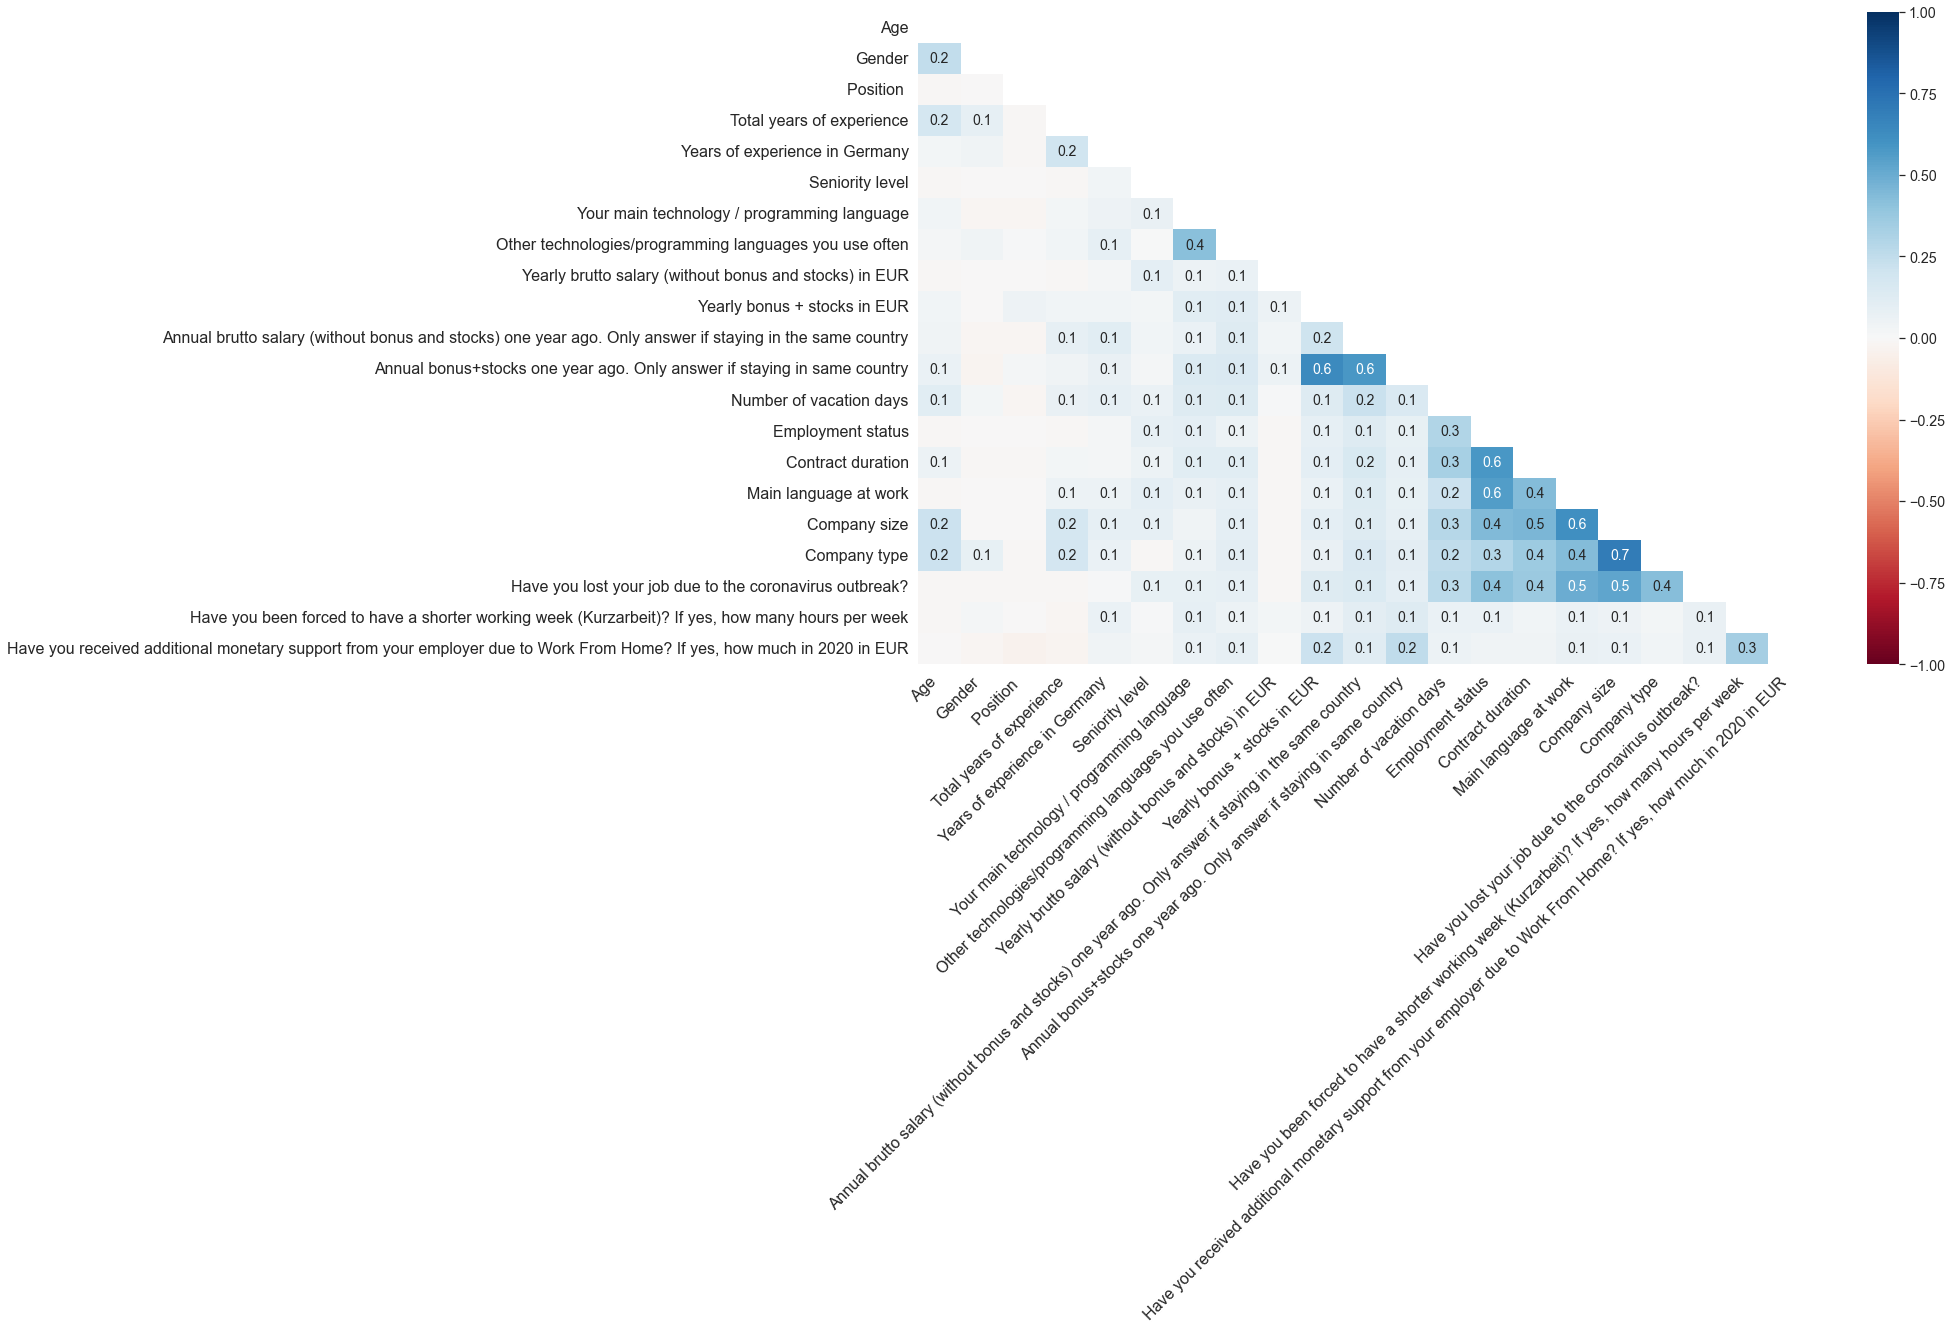

In [4508]:
mano.heatmap(df).figsize=(20,20)

#### Co-Relation Matrix

C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\3130030280.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


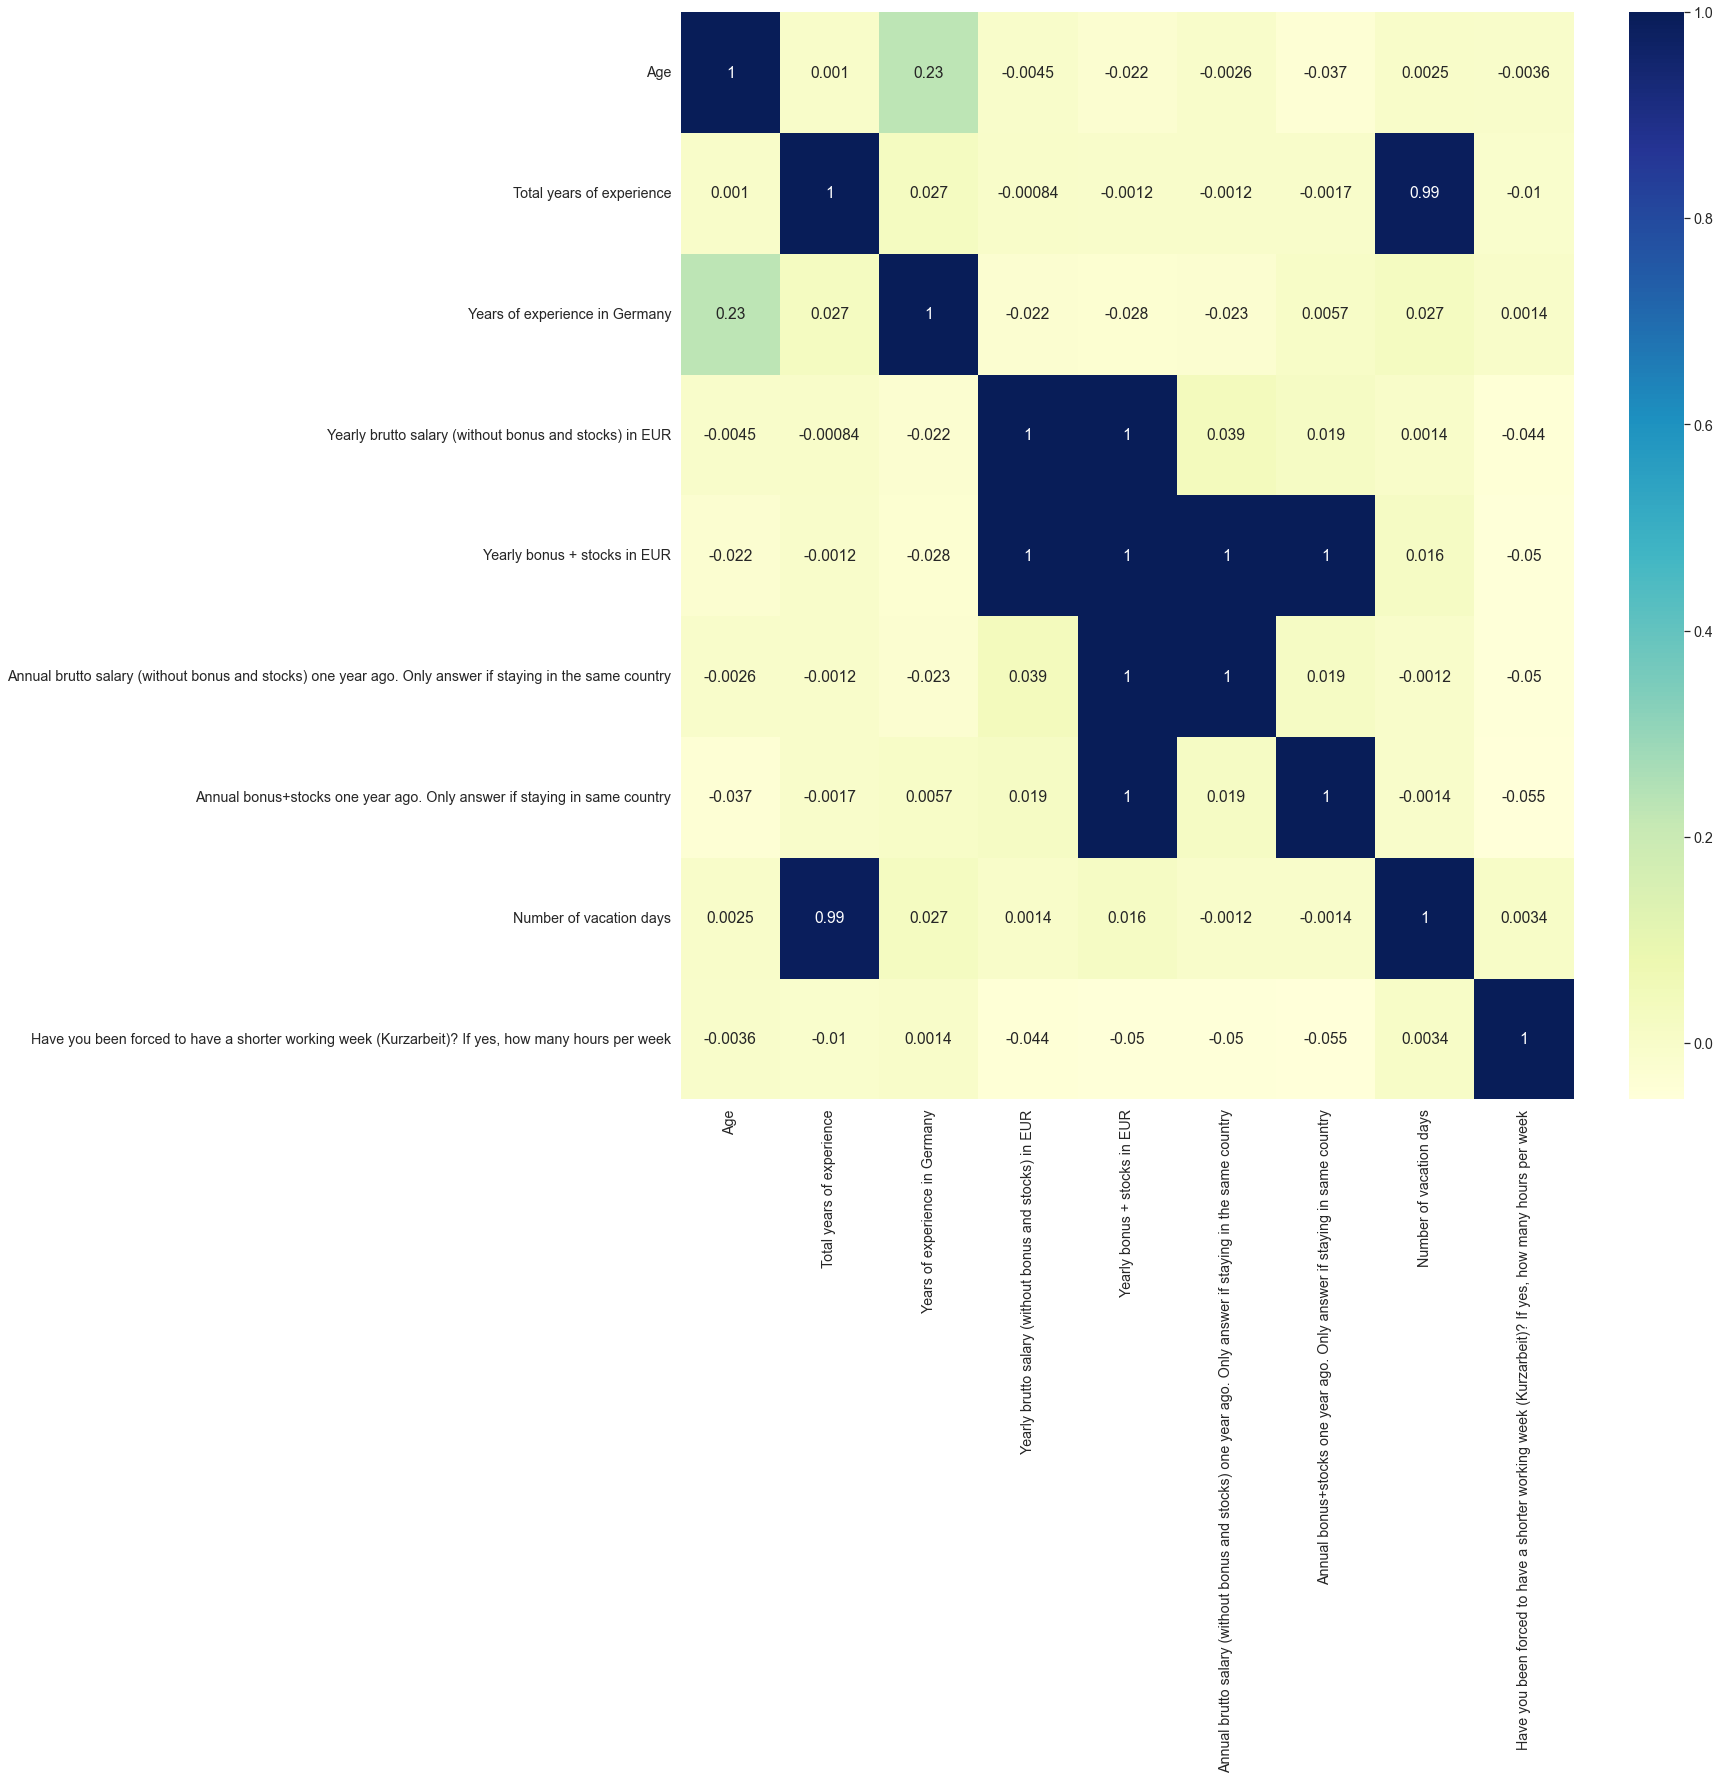

In [4509]:
#plot correlation matrix of df
def plot_correlation_matrix(df):
    corr = df.corr()

    fig, ax = plt.subplots(figsize=(20, 20))    

    sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)
    plt.show()

plot_correlation_matrix(df)
#plot correlation matrix of df

#### <b> Timestamp Analysis </b>

<AxesSubplot:>

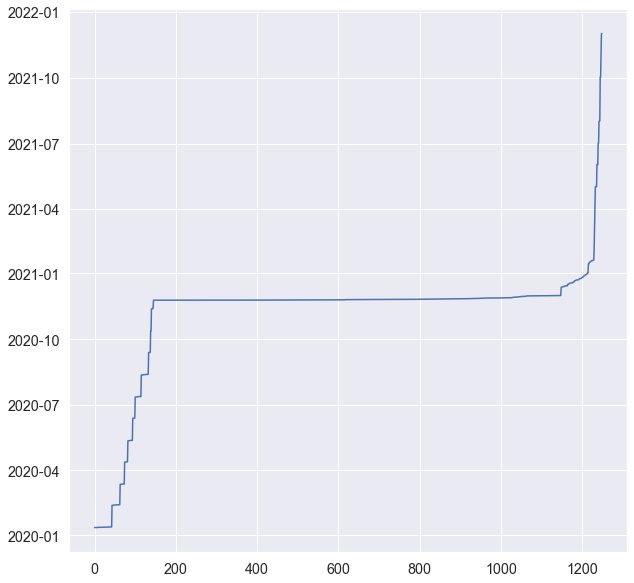

In [4510]:
copyDF = df.copy()
copyDF['Timestamp'] = pd.to_datetime(copyDF['Timestamp'])
copyDF = copyDF.sort_values(by='Timestamp').reset_index(drop=False)
copyDF['Timestamp'].plot()

<font size = "3">
- It shows that the data is recorded between 2020 and 2021.<br>
- Majority of the data belongs from the year 2020.
</font>

### <b>Age Distribution Analysis</b>

#### Univariate Analysis of Age

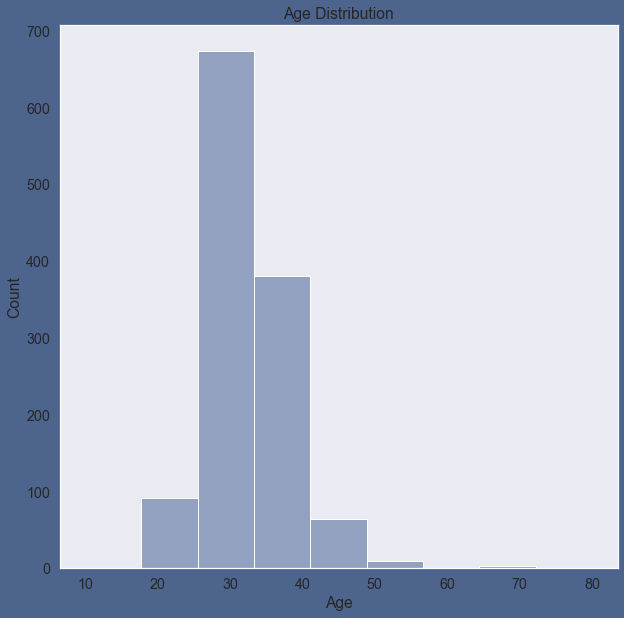

Age Descriptive Statistics


count    1226.0
mean       34.0
std        45.0
min        20.0
25%        29.0
50%        32.0
75%        35.0
max      1341.0
Name: Age, dtype: float64

In [4511]:
sns.set(font_scale=1.3)
colors = ['#4d648d', '#7389ae', '#a4b4c4', '#d3d3d3']
fig = plt.figure()
plot=sns.histplot(x = df['Age'],bins= 9,binrange=(10, 80),color=colors[1])
plt.title('Age Distribution')
fig.set_facecolor('#4d648d')

plt.rcParams['figure.figsize'] = (10, 10)
plt.grid()
plt.show()

print('Age Descriptive Statistics')
df['Age'].describe().round()

<font size = "3">
- Min Value : 20, as 20 is the minimum value.<br> 
- Max value : 1341, which is <b><i>incorrect</b></i>, so the value of 1341 should be removed.
</font>

fig = plt.figure(figsize = (10, 7))

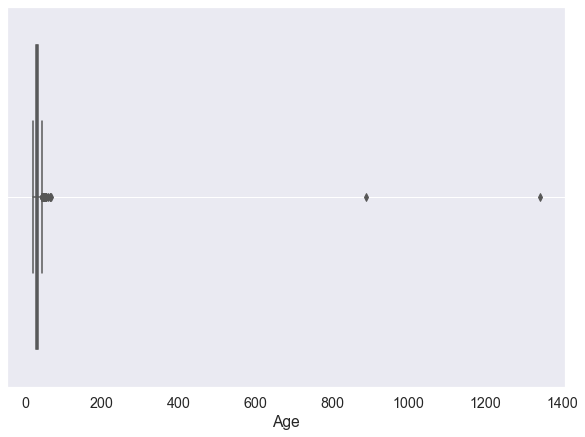

In [4512]:
colors = ['#4d648d', '#7389ae', '#a4b4c4', '#d3d3d3']
fig.set_facecolor('#4d648d')
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = df['Age'],color=colors[1])
plt.grid()
plt.show()

<font size = "3"> 
<b> Analysis </b><br>
- Two Extreme Values<br>
- Mean could not be applied on the dataset<br>
- Both Values greater than 200 <br>
<b> Strategy </b><br>
- Replace them with null values and then using imputation fill the missing values.


In [4513]:
df.loc[df['Age'] > 200, 'Age'] = np.nan

In [4514]:
df[df['Age'].isnull()]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Contract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
11,24/11/2020 11:18,NaN,Male,Berlin,Software Engineer,25.0,11.0,Senior,C++,"Python, C/C++, SQL",...,13000.0,24.0,Self-employed (freelancer),Temporary contract,English,Nov-50,Product,Yes,NaN,NaN
12,24/11/2020 11:18,NaN,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,...,NaN,NaN,Full-time employee,Unlimited contract,English,1000+,NaN,No,NaN,1000
28,24/11/2020 11:25,NaN,Male,Berlin,DevOps,14.0,5.0,Senior,NaN,"Python, Go, AWS, Kubernetes, Docker",...,NaN,30.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
55,24/11/2020 11:33,NaN,Male,Berlin,Software Engineer,NaN,1.0,Senior,PHP,NaN,...,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,0.0,NaN
113,24/11/2020 11:56,NaN,Male,Berlin,QA Engineer,6.0,6.0,Middle,Javascript,"Javascript / Typescript, AWS",...,NaN,30.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,NaN
300,24/11/2020 15:47,NaN,Male,Berlin,Data Engineer,7.5,1.5,Middle,SQL,"Python, SQL, AWS, Kubernetes, Docker",...,0.0,30.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
330,24/11/2020 17:29,NaN,NaN,Munich,Data Scientist,2.0,2.0,Middle,Python,NaN,...,NaN,20.0,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
340,24/11/2020 17:40,NaN,Male,Hamburg,Support Engineer,NaN,2.0,Senior,NaN,"Kubernetes, Docker",...,NaN,28.0,Full-time employee,Unlimited contract,English,NaN,NaN,No,NaN,100
365,24/11/2020 18:31,NaN,Male,Berlin,Software Engineer,9.0,1.0,Lead,Java,"AWS, Docker",...,NaN,24.0,Full-time employee,Unlimited contract,English,1000+,Startup,No,20.0,No
374,24/11/2020 18:48,NaN,Male,Karlsruhe,Backend Developer,8.0,8.0,Lead,Python,"Python, C/C++, Javascript / Typescript, Java /...",...,5400.0,29.0,Part-time employee,Unlimited contract,English,up to 10,Product,No,39.0,10000


#### Bi-Variate Analysis of Age

<font size ="3"> The Co-Relation Maps and Co-Relation Matrix shows that the Age column have the following Co-Relations with Other Columns:

- Gender : 0.2  (Small Co-Relation)
- Total Year of Experience: 0.1 (Small Corelation)
- Years of Experience in Germany: 0.23 (Statistically Significant)
- Contract Duration: 0.1 (Small Co-Relation)
- Company Size: 0.2 (Small Co-Relation)
- Company Type: 0.2 (Small Co-Relation)

<i> So K-Nearest Neighbors (KNN) Imputation could not be applied as the co-relation between various columns is not that high </i>

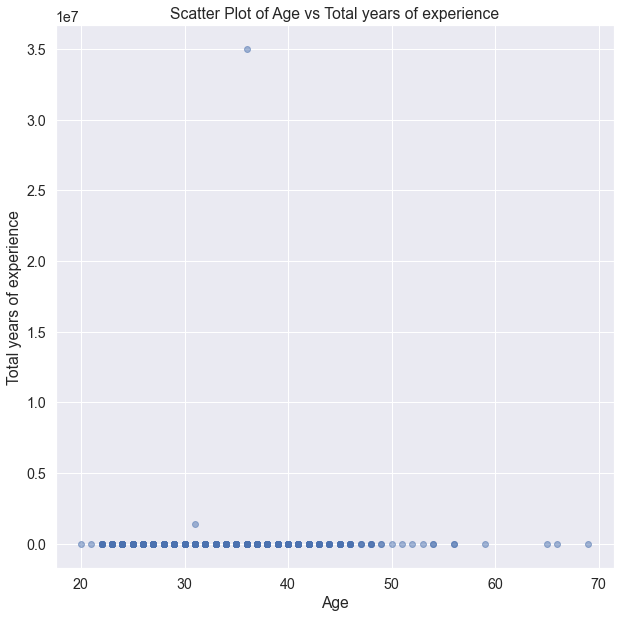

In [4515]:
x = df['Age'].fillna(df['Age'].median())
y = df['Total years of experience'].fillna(df['Total years of experience'].median())
plt.scatter(x,y,alpha=0.5).figsize=(30,30)
plt.xlabel('Age')
plt.ylabel('Total years of experience')
plt.title('Scatter Plot of Age vs Total years of experience')
plt.show()

<font size = "3">
- Weak Correlation between Age and Total Years of Experience<br>
- Above point could also be proven as Corelation Heatmap also shows Weak Correlation
</font>

In [4516]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         25
Gender                                                                                                                       6
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   19
Years of experience in Germany                                                                                              55
Seniority level                                                                                                

<font size = "4"> ANOVA Test </font>

In [4517]:
model = ols('Age ~ C(Q("Total years of experience"))', data=df).fit()
print("---------------------------------------------------------------------------------")
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Age - Total years of experience")
display(anova_table)
print("---------------------------------------------------------------------------------")
f_oneway(df['Age'], df['Total years of experience'])

---------------------------------------------------------------------------------

Anova => Age - Total years of experience


c:\Python\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
"C(Q(""Total years of experience""))",22689.816829,43.0,37.906276,2.152689e-186
Residual,16231.175083,1166.0,NaN,NaN


---------------------------------------------------------------------------------


F_onewayResult(statistic=nan, pvalue=nan)

<font size = "3">
Null Hypothesis Rejected - Means are not same
</font>

In [4518]:
model = ols('Age ~ C(Q("Years of experience in Germany"))', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Age - Years of experience in Germany")
print("---------------------------------------------------------------------------------")
display(anova_table)
print("---------------------------------------------------------------------------------")
f_oneway(df['Age'], df['Years of experience in Germany'])


Anova => Age - Years of experience in Germany
---------------------------------------------------------------------------------


,sum_sq,df,F,PR(>F)
"C(Q(""Years of experience in Germany""))",12007.918133,35.0,15.202035,5.011947e-72
Residual,25637.535792,1136.0,NaN,NaN


---------------------------------------------------------------------------------


F_onewayResult(statistic=nan, pvalue=nan)

<font size = "3">
Null Hypothesis Rejected - Means are not same
</font>

<font size = "4"> Chi-Squared Test </font>

In [4519]:
data_crosstab = pd.crosstab(df['Age'], df['Total years of experience'], 
margins = False) 
stat, p, dof, expected = chi2_contingency(data_crosstab)
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


In [4520]:
data_crosstab = pd.crosstab(df['Age'], df['Years of experience in Germany'], 
margins = False) 
stat, p, dof, expected = chi2_contingency(data_crosstab)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


#### Applying Iterative Imputer

In [4521]:
imp = IterativeImputer(max_iter=100, random_state=10,initial_strategy='median')

impute = ['Age']
imp.fit(df[impute])

df[impute] = imp.transform(df[impute])

<font size = "3">
The advantage of using an iterative imputer is that it can provide more accurate imputations than other methods such as mean imputation, especially when the missing values are not missing completely at random (MCAR) but are missing at random (MAR) or not missing at random (NMAR). By iteratively updating the model and using the updated model to make predictions, the iterative imputer can capture the underlying patterns in the data and provide more accurate imputations.
</font>

In [4522]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       6
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   19
Years of experience in Germany                                                                                              55
Seniority level                                                                                                

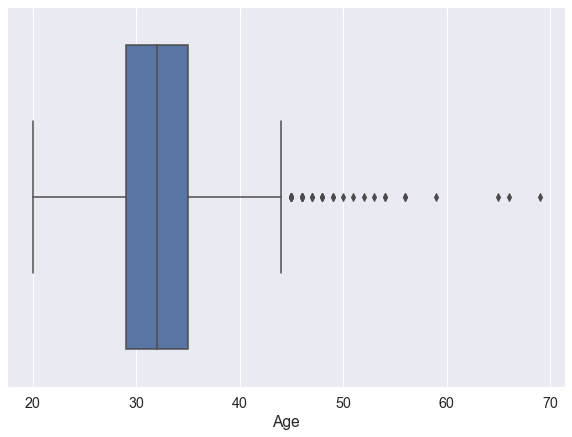

In [4523]:
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = df['Age'])
plt.show()

<font size = "3">The box plot shows that the missing values have now been adjusted accurately. The outlier values that exists in the dataset cannot be removed or changed as they represents data and contain valuable information</font>

### <b>Total Years of Experience</b>

<font size ="4">Univariate Analysis</font>

<AxesSubplot:title={'center':'Years Of Experience Distribution'}, ylabel='Frequency'>

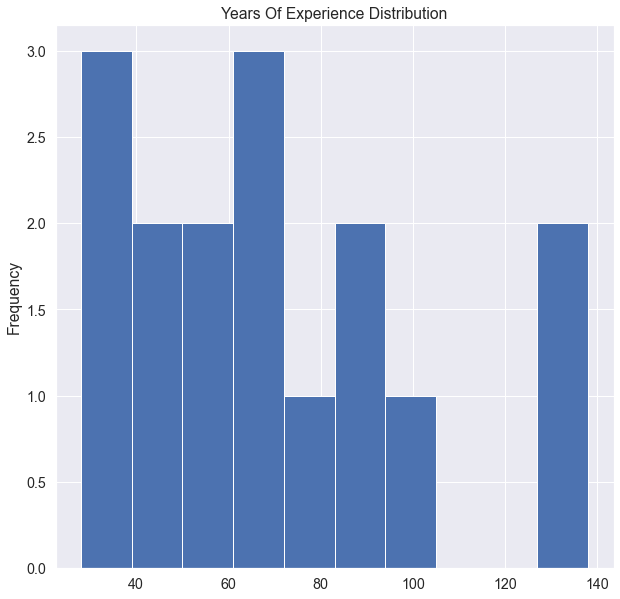

In [4524]:
df['Total years of experience'].value_counts()[:20].plot(kind='hist', figsize=(10, 10), title='Years Of Experience Distribution')

<AxesSubplot:title={'center':'Years Of Experience Distribution'}, ylabel='Density'>

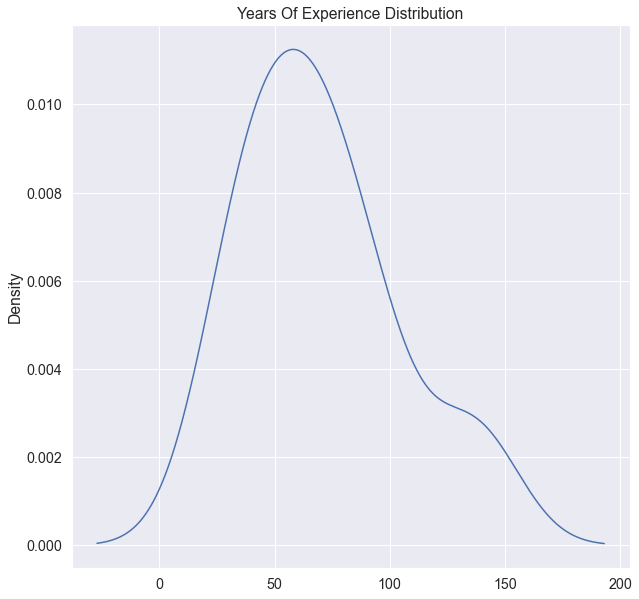

In [4525]:
df['Total years of experience'].value_counts()[:20].plot(kind='density', figsize=(10, 10), title='Years Of Experience Distribution')

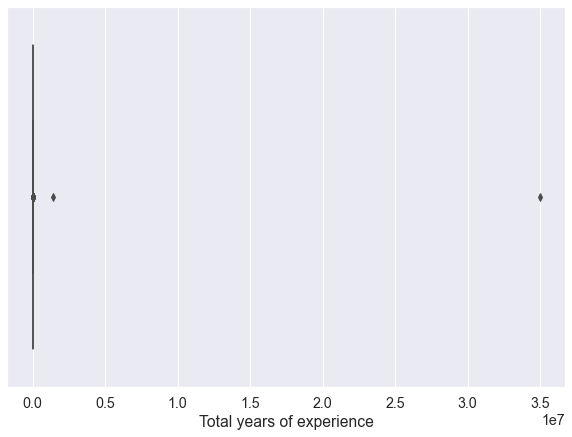

In [4526]:
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = df['Total years of experience'])
plt.show()

<font size = "4"> The box plot shows that their are not that many outliers in the data but these data outliers must be checked individually and we should make sure that no wrong values exist in the data set.
 </font>

<font size ="4"> Removing Outliers Using Tukey Test <font> 

In [4527]:
column_name = 'Total years of experience'
data = df.copy()
q1 = data[column_name].quantile(0.25)
q3 = data[column_name].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr

data[column_name] = np.where(
    (df[column_name] < lower_fence) | (df[column_name] > upper_fence),
    np.nan,
    df[column_name]
)

In [4528]:
data.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       6
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   43
Years of experience in Germany                                                                                              55
Seniority level                                                                                                

<font size = "3"> Tukey test or any other test that us quartile range for removal of outlier could not be used as the number of missing columns increased from 10 to 43 which means some values that contain imporatant and valuable data has also been removed </font>

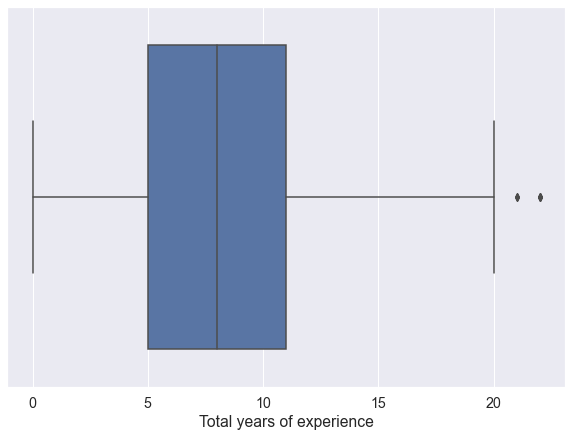

In [4529]:
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = data['Total years of experience'])
plt.show()

<font size = "3"> The box plot shows that the highest value is around 23, while in the dataset there are values greater than 23, so this method could not be used </font>

<font size = "4"> Removing Outlier Using Logical Analysis </font>

<font size = "3">
- Checking correctness of the column by comparing it with age column.<br>
- If Years of experience > Age, value to be replace with missing value   

In [4530]:
df.loc[df['Total years of experience'] >= df['Age'], 'Total years of experience'] = np.nan

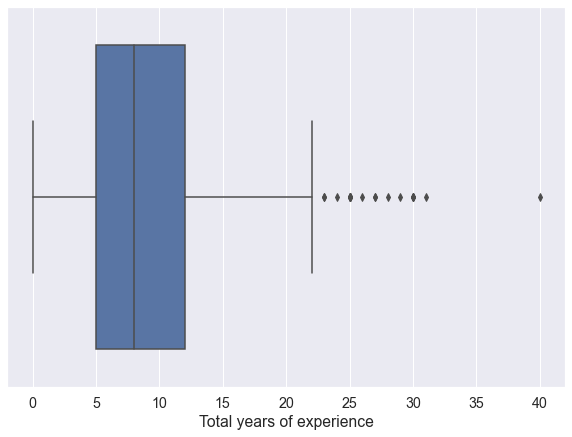

In [4531]:
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = df['Total years of experience'])
plt.show()

In [4532]:
df[df['Total years of experience'].isnull()]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Contract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
12,24/11/2020 11:18,32.0,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,...,NaN,NaN,Full-time employee,Unlimited contract,English,1000+,NaN,No,NaN,1000
55,24/11/2020 11:33,32.0,Male,Berlin,Software Engineer,NaN,1.0,Senior,PHP,NaN,...,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,0.0,NaN
237,24/11/2020 13:56,32.0,Male,Berlin,Backend Developer,NaN,3.0,Senior,Ruby,"Javascript / Typescript, Go, AWS, Docker",...,NaN,30.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,400
340,24/11/2020 17:40,32.0,Male,Hamburg,Support Engineer,NaN,2.0,Senior,NaN,"Kubernetes, Docker",...,NaN,28.0,Full-time employee,Unlimited contract,English,NaN,NaN,No,NaN,100
450,24/11/2020 22:06,48.0,Male,Berlin,Senior Network&Security Eng.,NaN,17.0,Senior,"Computer Networking, Network Security",SQL,...,0.0,26.0,Full-time employee,Unlimited contract,English,1000+,Startup,No,8.0,0
454,24/11/2020 22:22,33.0,Male,Berlin,Software Engineer,NaN,10.0,Senior,Java,"Java / Scala, Google Cloud, Kubernetes, Docker",...,0.0,25.0,Full-time employee,Unlimited contract,English,1000+,Product,No,8.0,180
468,25/11/2020 0:01,31.0,Female,Berlin,Product Manager,NaN,1.0,Senior,NaN,NaN,...,NaN,20.0,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,NaN
486,25/11/2020 8:35,40.0,Female,Berlin,Software Engineer,NaN,NaN,Junior,JavaScript,Ruby,...,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,1200
530,25/11/2020 11:03,32.0,Male,Leipzig,Frontend Developer,NaN,6.0,Middle,JavaScript,PHP,...,NaN,28.0,Full-time employee,Unlimited contract,German,101-1000,Product,No,30.0,NaN
702,25/11/2020 21:10,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,...,NaN,30.0,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN


<font size = "4"> Bi-Variate Statistics </font>

<font size ="3"> The Co-Relation Maps and Co-Relation Matrix shows that the Age column have the following Co-Relations with Other Columns:

- Years of Experience in Germany: 0.2 (Small Co-Relation)
- Company Size: 0.2 (Small Co-Relation)
- Company Type: 0.2 (Small Co-Relation)

- <b>Co-Relation Matrix :</b> Shows High Co-Relation with 'Number of vacation days'

<i> So K-Nearest Neighbors (KNN) Imputation could not be applied as the co-relation between various columns is not that high </i>

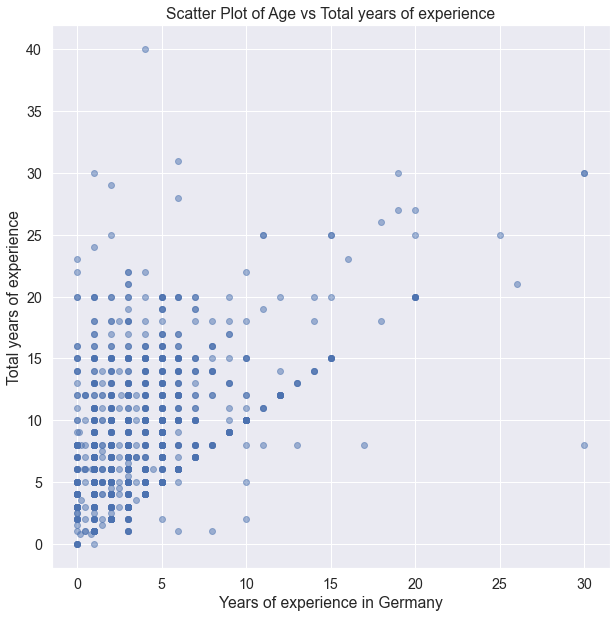

In [4533]:
data = df.copy()
x = data['Years of experience in Germany'].fillna(data['Years of experience in Germany'].median())
y = data['Total years of experience'].fillna(data['Total years of experience'].median())


plt.scatter(x,y,alpha=0.5).figsize=(30,30)
plt.xlabel('Years of experience in Germany')
plt.ylabel('Total years of experience')
plt.title('Scatter Plot of Age vs Total years of experience')
plt.show()

<font size = "3">
- Weak Correlation between 'Years of experience in Germany' and 'Total Years of Experience'<br>
- Above point could also be proven as Corelation Heatmap also shows Weak Correlation
</font>

#### Applying Iterative Imputer

In [4534]:
imp = IterativeImputer(max_iter=100, random_state=10,initial_strategy='median')

impute = ['Total years of experience']
imp.fit(df[impute])

df[impute] = imp.transform(df[impute])

In [4535]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       6
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                              55
Seniority level                                                                                                

<font size = "3"> Ploting Box-Plot to check whether the missing values have been imputed correctly</font>

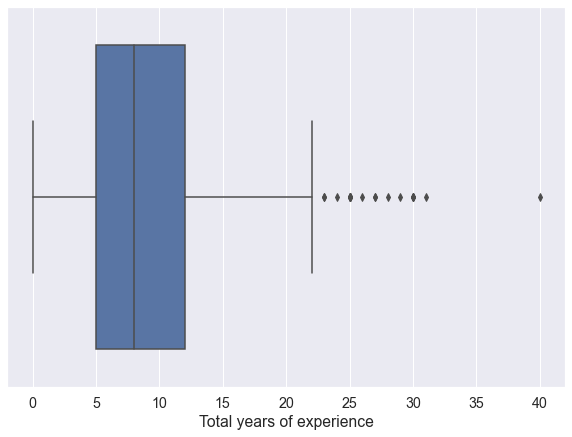

In [4536]:
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = df['Total years of experience'])
plt.show()

### <b> Years of Expereience in Germany </b>

<font size = "4"> Univariate Analysis of Years of Expereience in Germany </font>

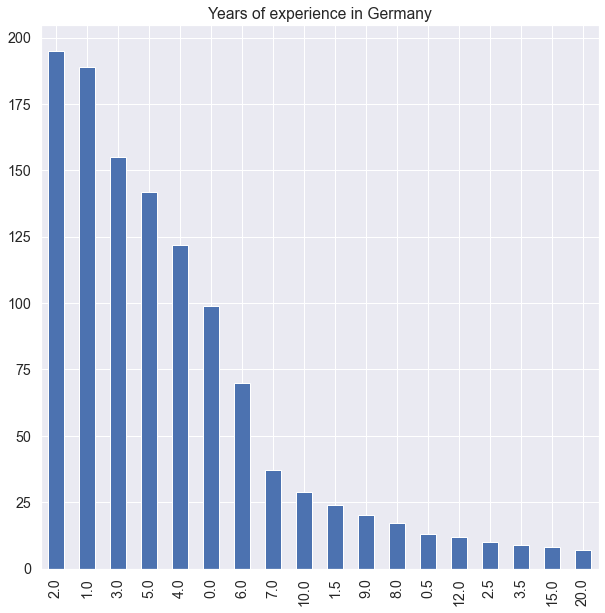

In [4537]:
valuesToPlot = df['Years of experience in Germany'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Years of experience in Germany')

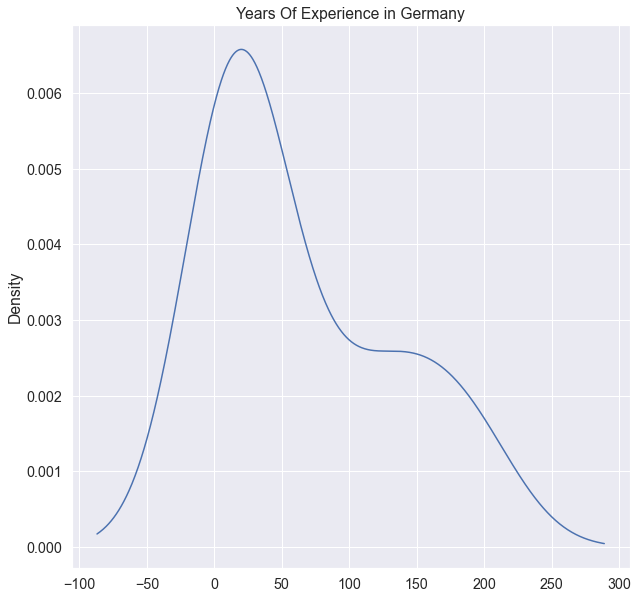

In [4538]:
valuesToPlot = df['Years of experience in Germany'].value_counts()[:20].plot(kind='density', figsize=(10, 10), title='Years Of Experience in Germany')

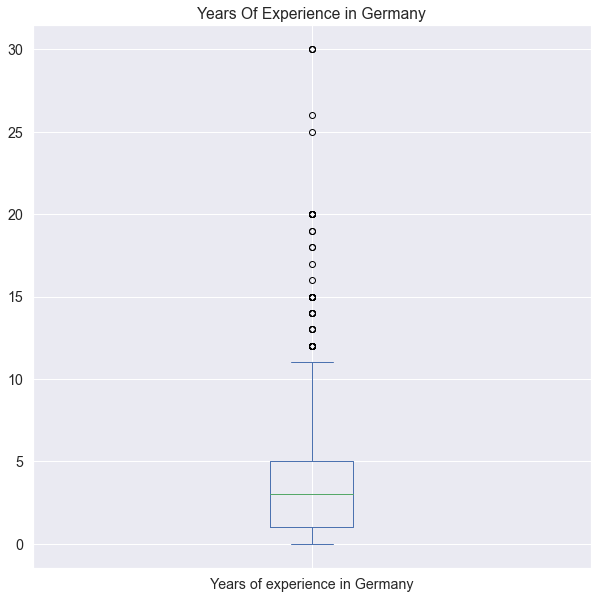

In [4539]:
valuesToPlot = df['Years of experience in Germany'].plot(kind='box', figsize=(10, 10), title='Years Of Experience in Germany')

<font size = "3"> All values seems reasonable logically, outliers could not be removed as they might contain some important or valuable information</font>

<font size = "4"> Removing Inconsistent Data Using Logical Analysis </font>

<font size = "3">
- Checking correctness of the column by comparing it with 'Total years of experience'.<br>
- If 'Total years of experience' < 'Years of experience in Germany', value to be replace with missing value   

In [4540]:
df.loc[df['Total years of experience'] < df['Years of experience in Germany'], 'Years of experience in Germany'] = np.nan

In [4541]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       6
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                              69
Seniority level                                                                                                

<font size = "4"> Bi-Variate Statistics of Years of Expereience in Germany</font>

<font size ="3"> The 
Co-Relation Maps shows that the 'Years of Expereience in Germany' column have the following Co-Relations with Other Columns:

- Main Language at Work: 0.1 (Small Co-Relation)
- Company Size: 0.1 (Small Co-Relation)
- Company Type: 0.1 (Small Co-Relation)

Co-Relation Matrix shows that the 'Years of Expereience in Germany' column have the following Co-Relations with Other Columns:

- Age : 0.23 (Statistically Significant)
- Total Year of Expereince : 0.027 


<i> So K-Nearest Neighbors (KNN) Imputation could not be applied as the co-relation between various columns is not that high </i>

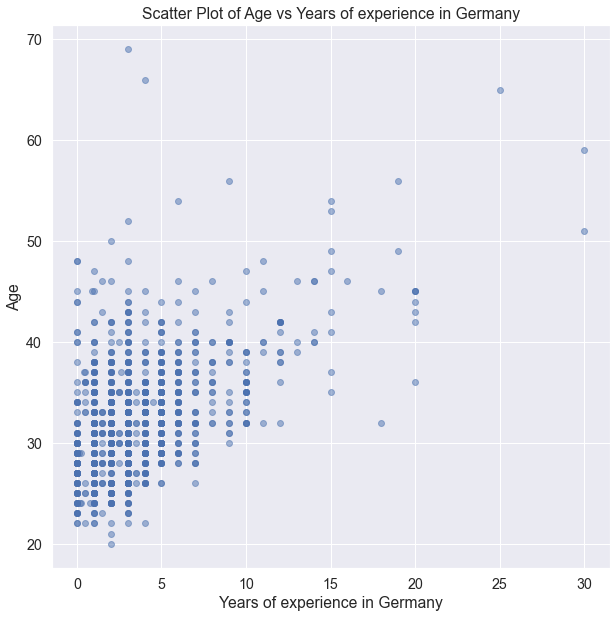

In [4542]:
data = df.copy()
x = data['Years of experience in Germany'].fillna(data['Years of experience in Germany'].median())
y = data['Age'].fillna(data['Age'].median())

plt.scatter(x,y,alpha=0.5).figsize=(30,30)
plt.xlabel('Years of experience in Germany')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs Years of experience in Germany')
plt.show()

<font size = "3">
- Weak Correlation between 'Years of experience in Germany' and 'Age'<br>
- Above point could also be proven as Corelation Heatmap also shows Weak Correlation </font>

#### Applying Iterative Imputer

In [4543]:
imp = IterativeImputer(max_iter=100, random_state=10,initial_strategy='median')

impute = ['Years of experience in Germany']
imp.fit(df[impute])

df[impute] = imp.transform(df[impute])

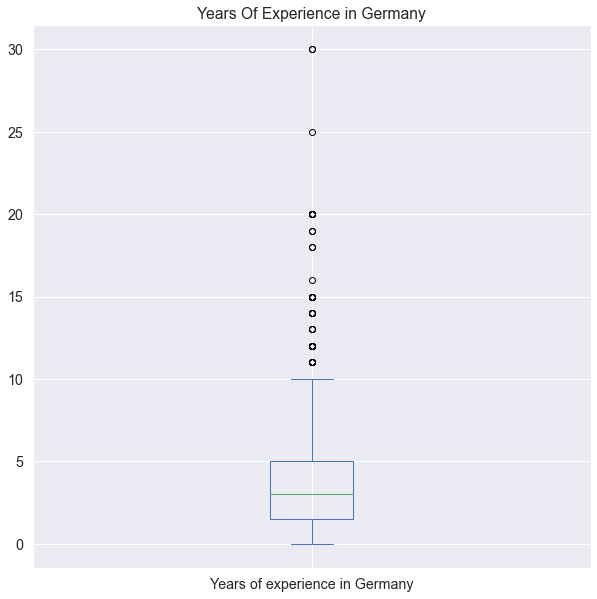

In [4544]:
valuesToPlot = df['Years of experience in Germany'].plot(kind='box', figsize=(10, 10), title='Years Of Experience in Germany')

<font size = "3">As the highest and the lowest values are still the same so it shows that the missing values have been handeled correctly.</font>

In [4545]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       6
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

### <b>Gender Distribution Analysis</b>

<font size = "4">Univariate Analysis</font>

In [4546]:
df['Gender'].value_counts()

Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64

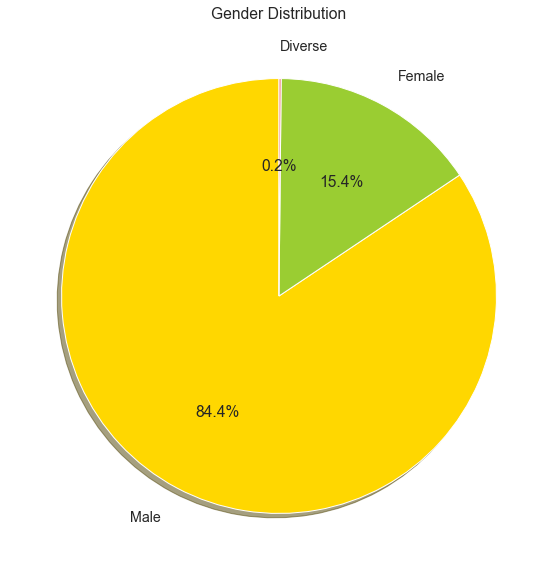

In [4547]:
labels = 'Male','Female','Diverse'
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(df['Gender'].value_counts(), labels=labels,labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },autopct='%1.1f%%', shadow=True, startangle=90, colors= colors)
plt.title("Gender Distribution")
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

<font size = "3"> 
- Male's are in majority as they represent 84.4% of the data<br>
- So, we will apply mode for replacing missing values 
</font>

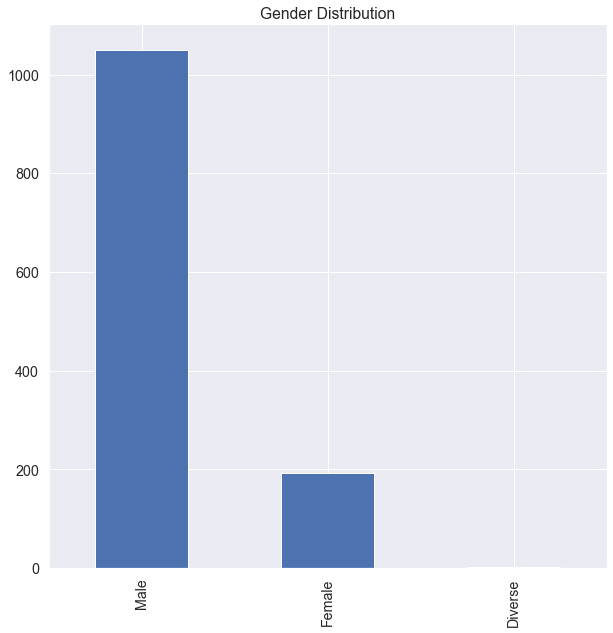

In [4548]:
valuesToPlot = df['Gender'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Gender Distribution')

In [4549]:
modeValue = df['Gender'].mode()[0]
df['Gender'].fillna(modeValue,inplace=True)

<font size = "4"> Bi-Variate Statistics of Gender</font>

<font size = "3">Co-Relation Maps shows that the 'Gender' column have the following Co-Relations with Other Columns:

- Total Year of Experience: 0.1 (Small Co-Relation)
- Company Type: 0.1 (Small Co-Relation)

</font> 

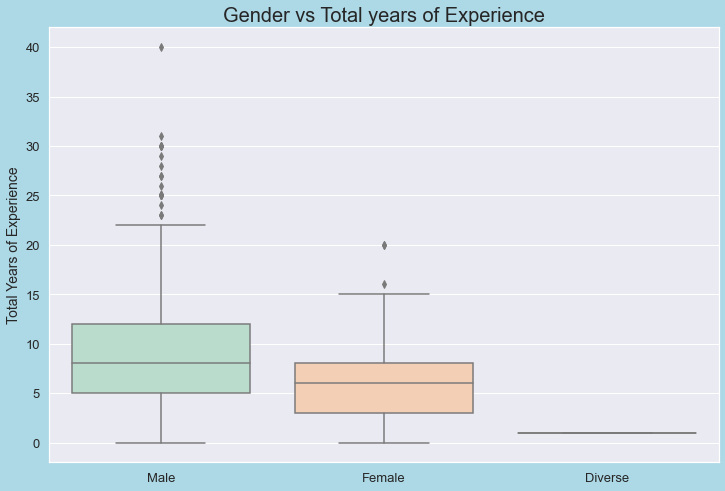

In [4550]:
new_df = df.copy()
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Total years of experience',data=new_df,palette='Pastel2')
fig.set_facecolor('lightblue')
plt.title("Gender vs Total years of Experience",fontsize=20)
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Total Years of Experience",fontsize=14)
plt.show()

<font size = "3">
- Median of 'Total Years of Exeperience' of Male > Median of 'Total Years of Exeperience' of Female <br>
- Shows: Males have more overall experience than females
</font>

In [4551]:
df['Gender'].value_counts()

Male       1055
Female      192
Diverse       2
Name: Gender, dtype: int64

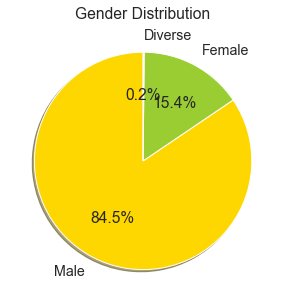

In [4552]:
labels = 'Male','Female','Diverse'
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(df['Gender'].value_counts(), labels=labels,labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },autopct='%1.1f%%', shadow=True, startangle=90, colors= colors)
plt.title("Gender Distribution")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

<font size = "3"> 
The majority of the values in a dataset were male values, so the missing values were replaced with the male values. This was determined to be an appropriate solution as it will not change the overall gender percentage distribution of the genders in the dataset.</font>

### <b>Employment Status</b>

<font size = "4"> Univariate Analysis of Employment Status

In [4553]:
df['Employment status'].value_counts()

Full-time employee                                                                 1187
Self-employed (freelancer)                                                           27
Part-time employee                                                                    8
Full-time                                                                             3
Founder                                                                               3
Company Director                                                                      1
freelancer                                                                            1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week

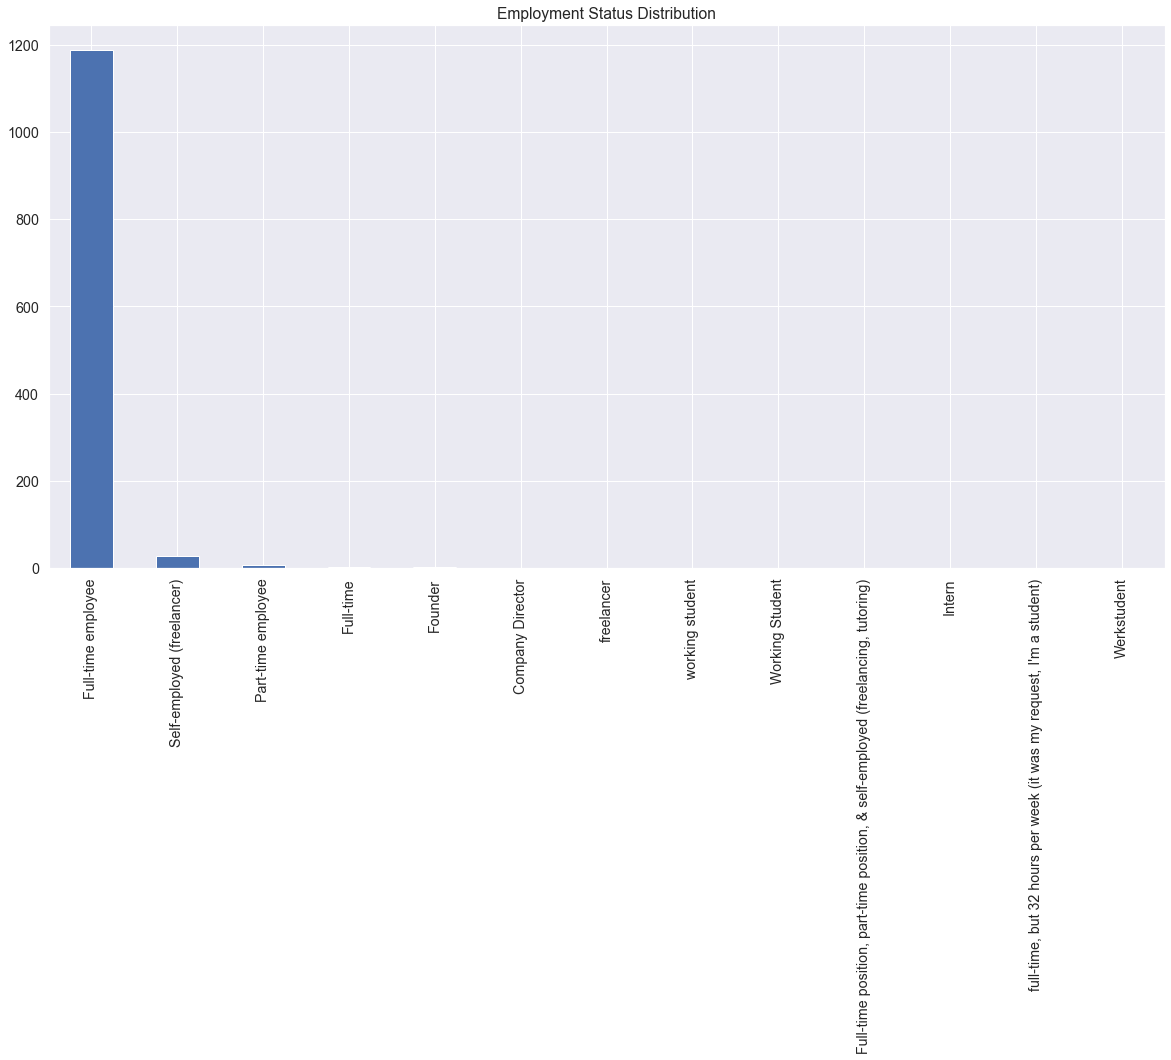

In [4554]:
valuesToPlot = df['Employment status'].value_counts().plot(kind='bar', figsize=(20, 10), title='Employment Status Distribution')

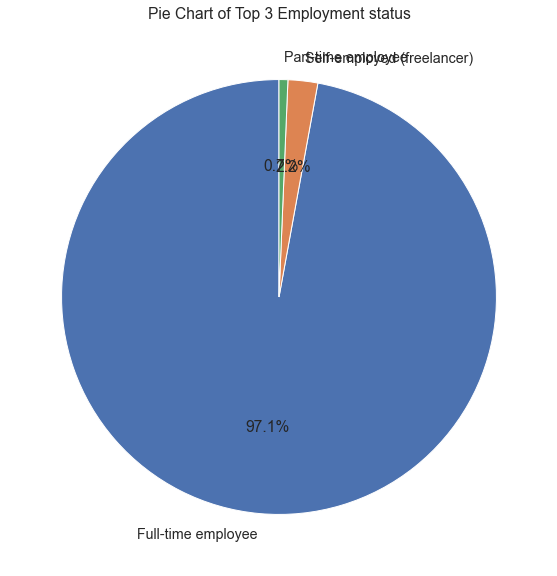

In [4555]:
column_to_plot = 'Employment status'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:3]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 3 {}'.format(column_to_plot))
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [10, 10]
# Display the chart
plt.show()

<font size = "3">
- Majority of the Employees Are Full-time Employees.<br>
- Huge difference between Highest Value and Second Highest Value.<br>
- So Mode could be applied to fill missing values in Employment Status Column.
</font>

<font size ="4">Bi-Variate Statistics of Employment Status</font>

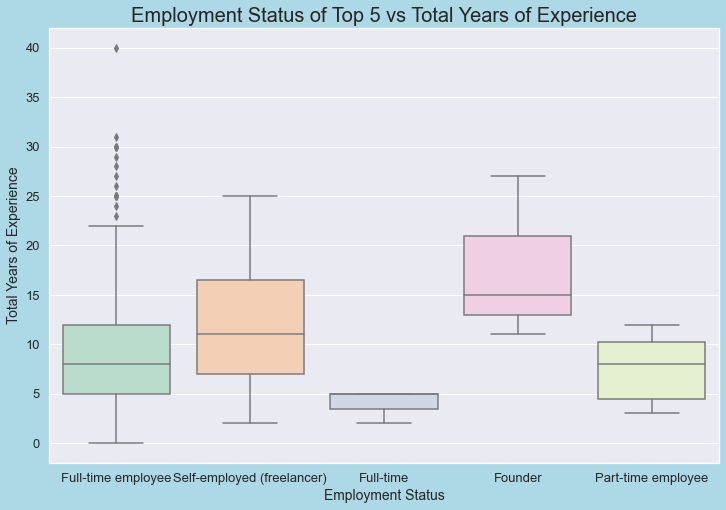

In [4556]:
new_df = df.copy()
fig = plt.figure(figsize=(12,8))
xValue = df['Employment status'].value_counts()[:5].index
sns.boxplot(x='Employment status', y='Total years of experience', data=new_df[new_df['Employment status'].isin(xValue)], palette='Pastel2')
fig.set_facecolor('lightblue')
plt.title("Employment Status of Top 5 vs Total Years of Experience", fontsize=20)
plt.xticks(fontsize=13)
plt.xlabel("Employment Status", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Total Years of Experience", fontsize=14)
plt.show()

<font size = "3">
- Founder's have the highest level of expereince, as their media is the highest<br>
- Full-time employee have lot of outlier values but these values could not be removed as represent valuable data<br>
</font>

In [4557]:
modeValue = df['Employment status'].mode()[0]
df['Employment status'].fillna(modeValue,inplace=True)

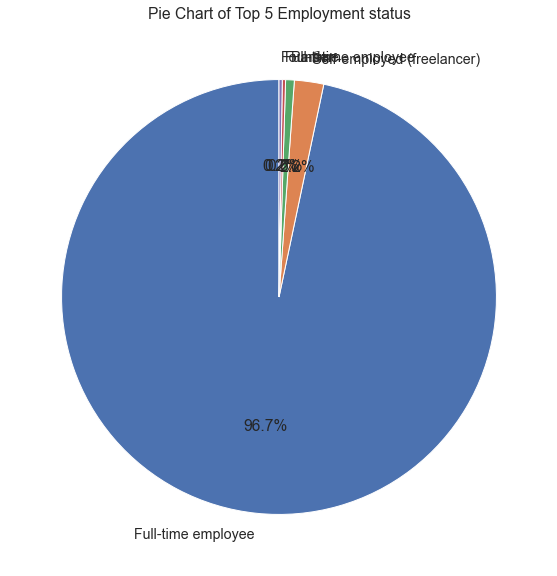

In [4558]:
column_to_plot = 'Employment status'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:5]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 5 {}'.format(column_to_plot))
plt.rcParams['figure.figsize'] = [10, 10]
# Display the chart
plt.show()

<font size = "3"> 
After visual analysis of the 'Position' column, it can be concluded that the missing values have been imputed correctly in the data set as the overall 'Position Percentage Distribution' remain same even after replacement of missing values.
</font>

In [4559]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

### <b> Filling Survey\Bonus Based Values </b>

In [4560]:
df['Yearly brutto salary (without bonus and stocks) in EUR'] = df['Yearly brutto salary (without bonus and stocks) in EUR'].fillna(df['Yearly brutto salary (without bonus and stocks) in EUR'].median())
df['Yearly bonus + stocks in EUR'] = df['Yearly bonus + stocks in EUR'].fillna(0)
df['Annual bonus+stocks one year ago. Only answer if staying in same country'] = df['Annual bonus+stocks one year ago. Only answer if staying in same country'].fillna(0)
df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'] = df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].fillna(0)
df['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'] = df['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'].fillna(0)
col1 = 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
col2 = 'Annual bonus+stocks one year ago. Only answer if staying in same country'
median = df[col1].median()
df.loc[df[col2].isnull(),col1] = median
df[col1] = df[col1].fillna(0)
df[col2] = df[col2].fillna(0)
column = ['Have you lost your job due to the coronavirus outbreak?']
for index, row in df.iterrows():
    for col in column:
        if row[col] =="Yes":
            df.loc[index,col] = 1 # type: ignore
        elif row[col] == 'No':
            df.loc[index,col] = 0 # type: ignore
        else:
            df.loc[index,col] = np.nan # type: ignore

df['Have you lost your job due to the coronavirus outbreak?'] = df['Have you lost your job due to the coronavirus outbreak?'].fillna(df['Have you lost your job due to the coronavirus outbreak?'].median())

df.shape

(1249, 23)

In [4561]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

### <b>Position</b>

<font size = "4"> Univariate Analysis of Position </font>

<AxesSubplot:title={'center':'Position Distribution'}>

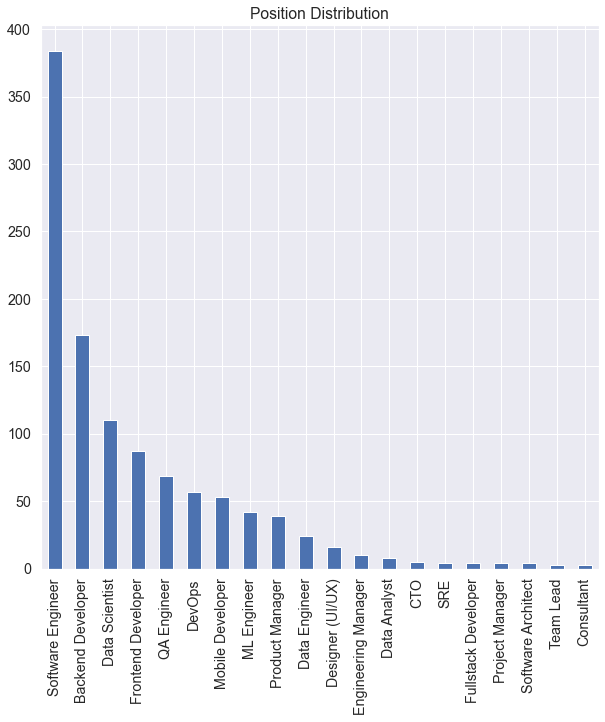

In [4562]:
df['Position '].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Position Distribution')

In [4563]:
df['Position '].value_counts()

Software Engineer            384
Backend Developer            173
Data Scientist               110
Frontend Developer            87
QA Engineer                   69
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position , Length: 151, dtype: int64

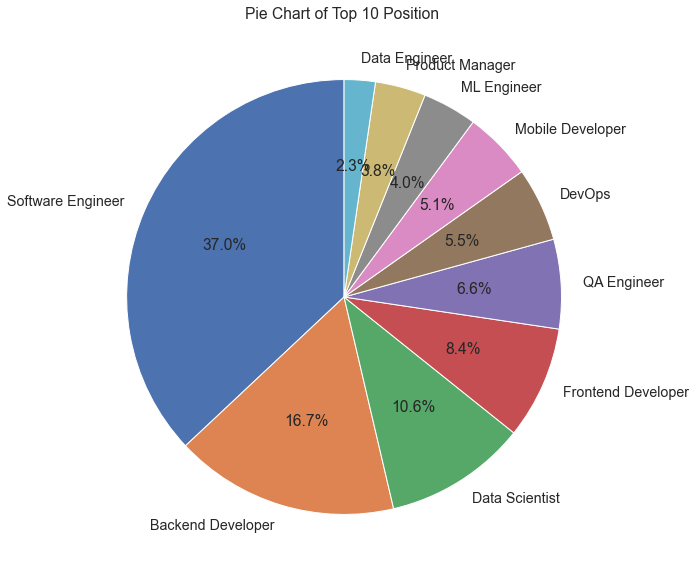

In [4564]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Position '

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3"> As the difference between the count of Software Engineering and Backend Developer is not significant we will not apply mode to fill the missing values of Position </font>

<font size = "4"> Bi-Variate Analysis of Position Column </font>

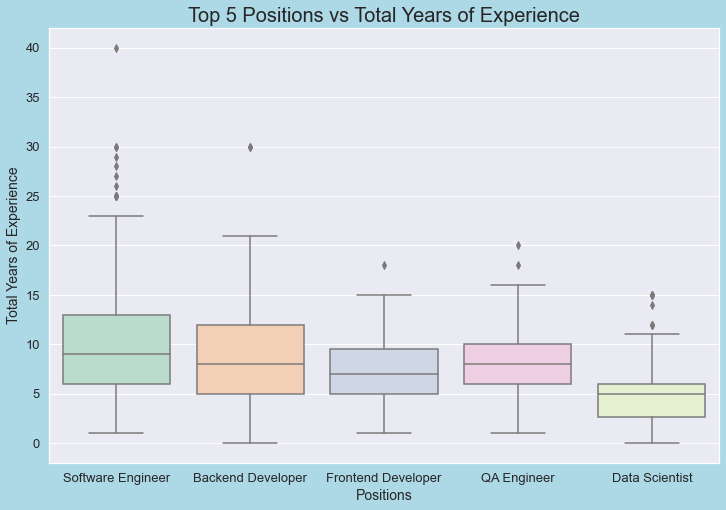

In [4565]:
new_df = df.copy()
fig = plt.figure(figsize=(12,8))
xValue = df['Position '].value_counts()[:5].index
sns.boxplot(x='Position ', y='Total years of experience', data=new_df[new_df['Position '].isin(xValue)], palette='Pastel2')
fig.set_facecolor('lightblue')
plt.title("Top 5 Positions vs Total Years of Experience", fontsize=20)
plt.xticks(fontsize=13)
plt.xlabel("Positions", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Total Years of Experience", fontsize=14)
plt.show()

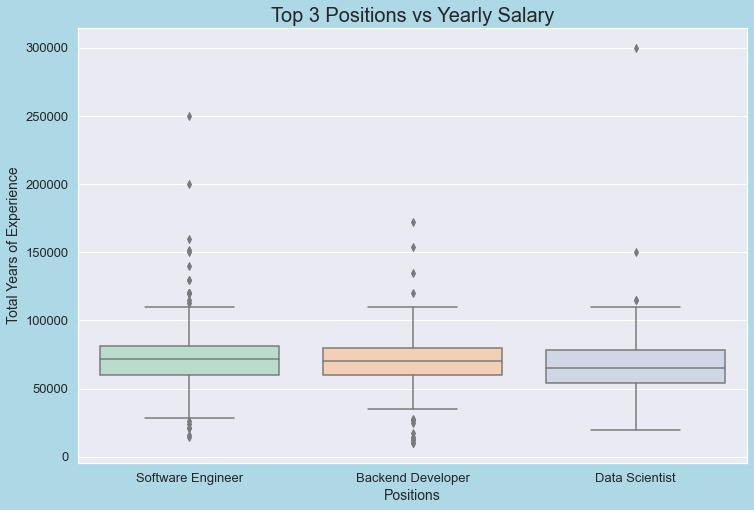

In [4566]:
new_df = df.copy()
fig = plt.figure(figsize=(12,8))
xValue = df['Position '].value_counts()[:3].index
sns.boxplot(x='Position ', y='Yearly brutto salary (without bonus and stocks) in EUR', data=new_df[new_df['Position '].isin(xValue)], palette='Pastel2')
fig.set_facecolor('lightblue')
plt.title("Top 3 Positions vs Yearly Salary", fontsize=20)
plt.xticks(fontsize=13)
plt.xlabel("Positions", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Total Years of Experience", fontsize=14)
plt.show()

<font size = 4> Applying KNN-Imputer To Fill Missing Positon Values <font>

In [4567]:
# Select Positon and all columns with 0 missing values
df_imputed = df[['Age','Gender','City','Total years of experience','Years of experience in Germany','Employment status','Yearly brutto salary (without bonus and stocks) in EUR','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Position ']]
df_imputed.shape
# Encode categorical column as labels
le = LabelEncoder()
for col in df_imputed.columns:
    if df_imputed[col].dtype == 'object':
        df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=200, weights='distance', metric='nan_euclidean')
imputed = imputer.fit_transform(df_imputed)

# Convert labels back to categorical values
for col in df.columns:
    if df[col].dtype == 'object' and col in df_imputed.columns:
        df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int)).astype(str)


df['Position '] = df_imputed['Position '] 



C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2354311929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2354311929.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int)).astype(str)


In [4568]:
print(df['Position '].value_counts())

Software Engineer            384
Backend Developer            173
Data Scientist               110
Frontend Developer            87
QA Engineer                   69
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position , Length: 152, dtype: int64


<font size = "3">
KNN-Imputer is a variation of this method that is specifically designed for imputing missing values in categorical variables. In this method, the KNN algorithm is used to identify the most similar records based on the categorical features of the dataset, and the missing values are imputed based on the mode (most frequent value) of the nearest neighbors. 
</font>

In [4569]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     0
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

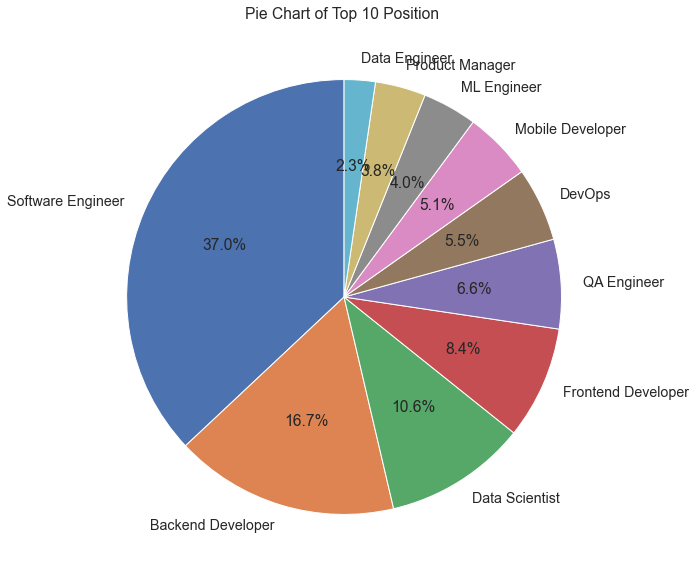

In [4570]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Position '

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3"> As the pie charts looks similar it is a prrof that the missing values have been imputed correctly </font>

### <b> Seneiority Level </b>

<font size = "4"> Univariate Analysis of Seneiority Level </font>

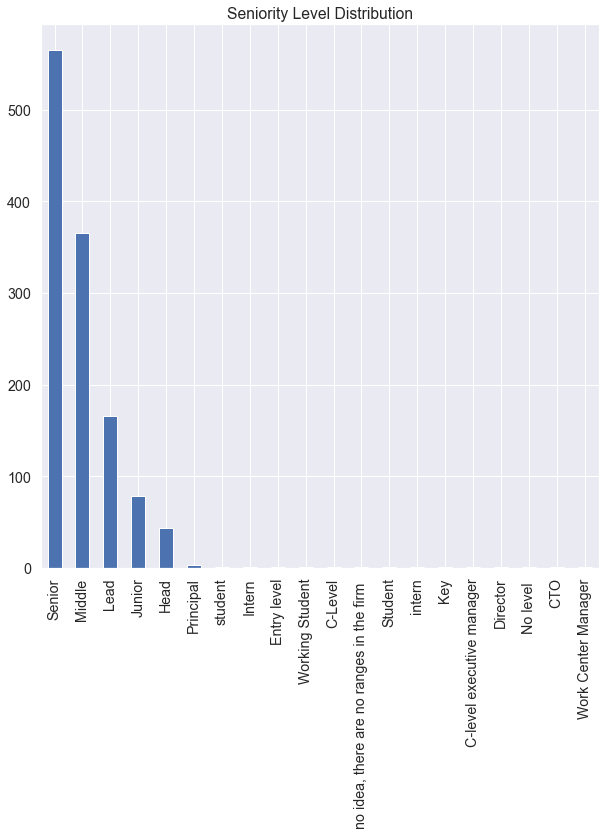

In [4571]:
valuesToPlot = df['Seniority level'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Seniority Level Distribution')

<font size = "3"> As the difference between the count of Senior and Backend Middle is not significant we will not apply mode to fill the missing values of Seniority Level </font>

In [4572]:
df['Seniority level'].value_counts()

Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager             

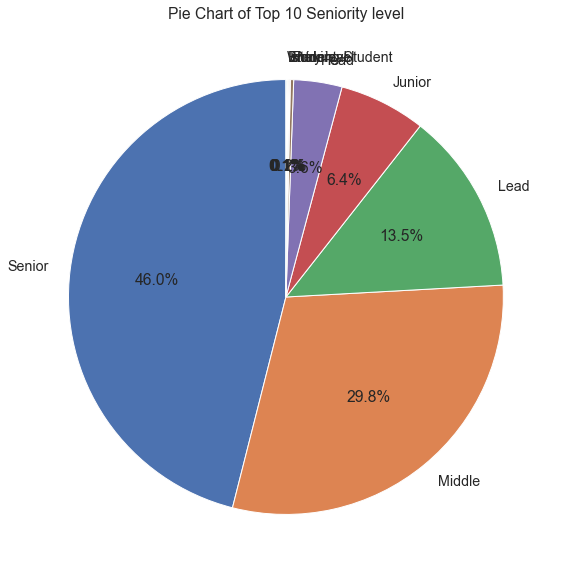

In [4573]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Seniority level'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "4"> Bi-Variate Analysis of Seniority level Column </font>

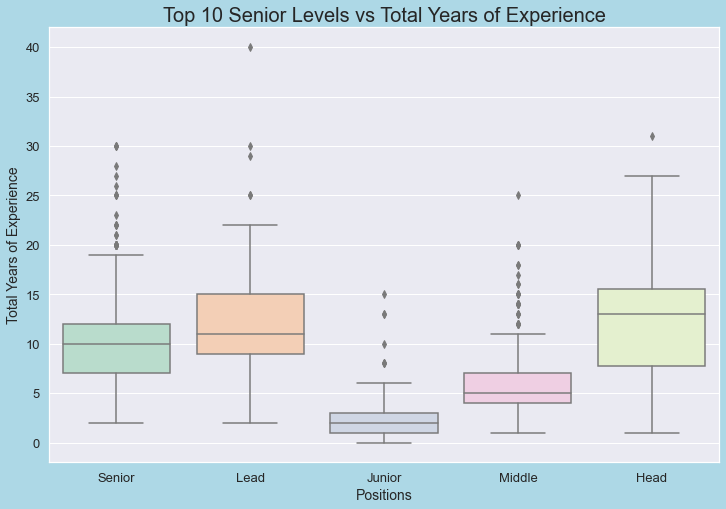

In [4574]:
new_df = df.copy()
fig = plt.figure(figsize=(12,8))
xValue = df['Seniority level'].value_counts()[:5].index
sns.boxplot(x='Seniority level', y='Total years of experience', data=new_df[new_df['Seniority level'].isin(xValue)], palette='Pastel2')
fig.set_facecolor('lightblue')
plt.title("Top 10 Senior Levels vs Total Years of Experience", fontsize=20)
plt.xticks(fontsize=13)
plt.xlabel("Positions", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Total Years of Experience", fontsize=14)
plt.show()

<font size = 4> Applying KNN-Imputer To Fill Missing Seniority Level Values <font>

In [4575]:
# Select Positon and all columns with 0 missing values
df_imputedNew = df[['Age','Gender','City','Total years of experience','Years of experience in Germany','Employment status','Yearly brutto salary (without bonus and stocks) in EUR','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Position ','Seniority level']]
# Encode categorical column as labels
le = LabelEncoder()
for col in df_imputedNew.columns:
    if df_imputedNew[col].dtype == 'object':
        df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=200, weights='distance', metric='nan_euclidean')
imputed = imputer.fit_transform(df_imputedNew)
df_imputedNew.dtypes


for col in df.columns:
    if df[col].dtype == 'object' and col in df_imputedNew.columns:
        categories = pd.unique(df[col].astype(str)).tolist()
        le.fit(categories + ['nan'])
        df_imputedNew[col] = le.inverse_transform(df_imputedNew[col].astype(int)).astype(str)


df['Seniority level'] = df_imputedNew['Seniority level']


C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\1208418567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\1208418567.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew[col] = le.inverse_transform(df_imputedNew[col].astype(int)).astype(str)


In [4576]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     0
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

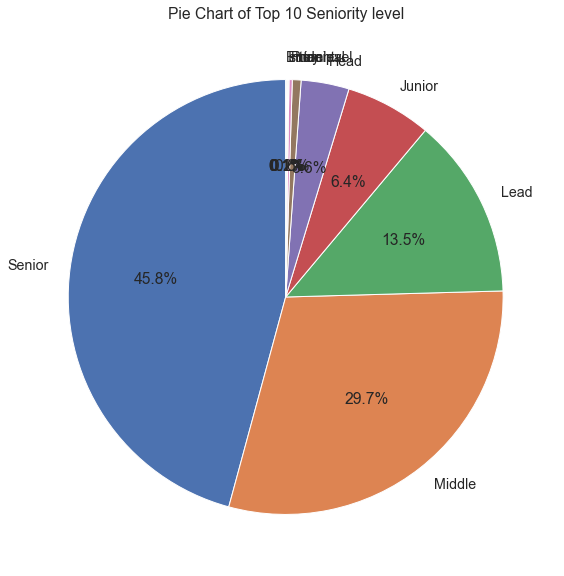

In [4577]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Seniority level'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

 ### <b> Your main technology / programming language </b>

<font size ="4">Univariate Analysis</font>

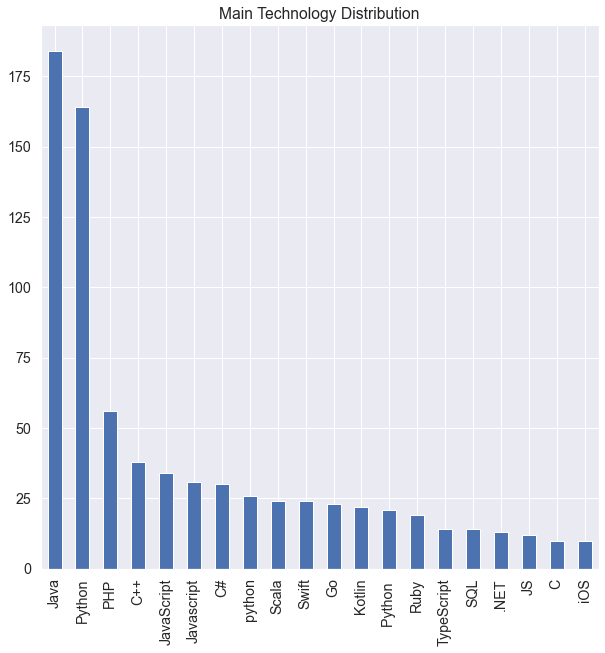

In [4578]:
valuesToPlot = df['Your main technology / programming language'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Main Technology Distribution')

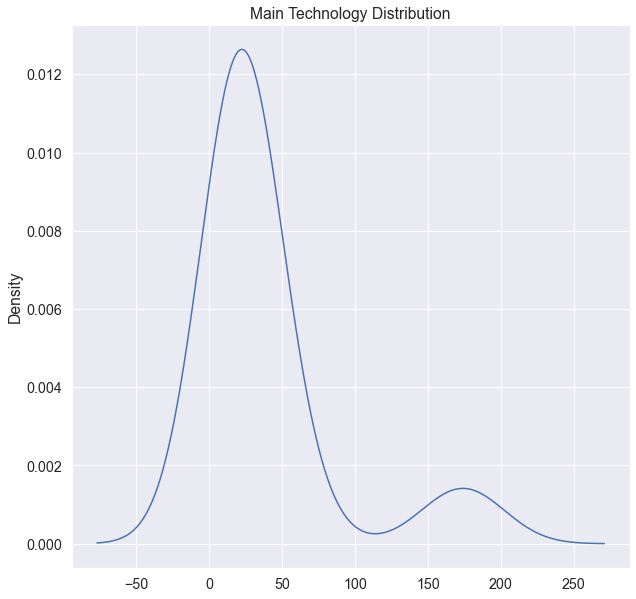

In [4579]:
valuesToPlot = df['Your main technology / programming language'].value_counts()[:20].plot(kind='density', figsize=(10, 10), title='Main Technology Distribution')

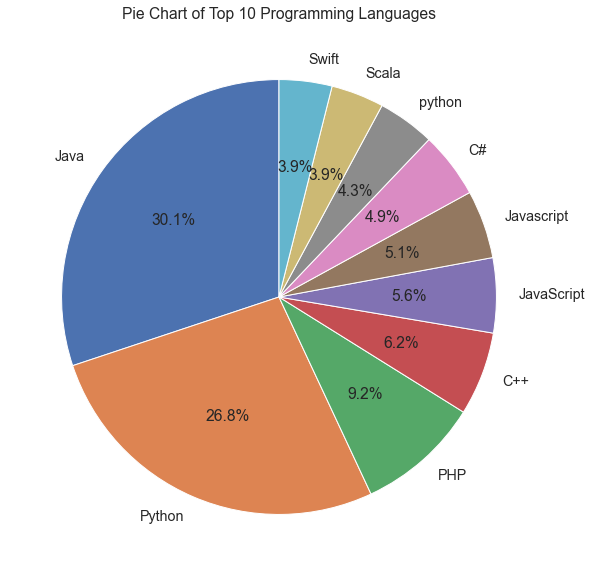

In [4580]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Your main technology / programming language'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 Programming Languages')

# Display the chart
plt.show()

<font size = "4"> Filling In Missing Values </font>

In [4581]:
import statistics

# define the columns to select
col1 = 'Other technologies/programming languages you use often'
col2 = 'Your main technology / programming language'

# define a function to replace null values for the selected columns
for index, row in df.iterrows():
    if pd.isna(df[col1][index]):
        if pd.notnull(df[col2][index]):
            # print(row[col2])
            df[col1][index] = df[col2][index]
        else:
            # print("jkjfsjdkb")
            mode = 'Kotlin, Javascript / Typescript'
            df[col1][index] = mode
            df[col2][index] = statistics.mode(df[col2])

    elif pd.isna(df[col2][index]):
        
            # print(row[col2])
            df[col2][index] = df[col1][index]
    
print(df[[col1, col2]].isnull().sum())
print(df[[col1, col2]].head())

C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2339035948.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1][index] = df[col2][index]
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2339035948.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1][index] = mode
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2339035948.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2][index] = statistics.mode(df[col2])
C:\Users

Other technologies/programming languages you use often    0
Your main technology / programming language               0
dtype: int64
  Other technologies/programming languages you use often  \
0                    Kotlin, Javascript / Typescript       
1                                               Ruby       
2                    Javascript / Typescript, Docker       
3                                         Javascript       
4                             .NET, SQL, AWS, Docker       

  Your main technology / programming language  
0                                  TypeScript  
1                                        Ruby  
2                     Javascript / Typescript  
3                                  Javascript  
4                                     C# .NET  


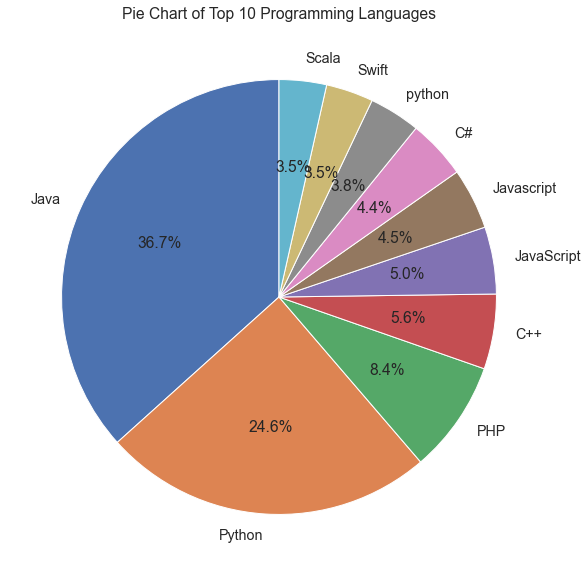

In [4582]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Your main technology / programming language'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 Programming Languages')

# Display the chart
plt.show()

### <b> Number of Vacation Days </b>

In [4583]:
df[df['Number of vacation days'].isnull()]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Contract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
12,24/11/2020 11:18,32.0,Male,Berlin,Software Engineer,8.0,3.0,Lead,PHP,PHP,...,0.0,NaN,Full-time employee,Unlimited contract,English,1000+,NaN,0.0,0.0,1000
55,24/11/2020 11:33,32.0,Male,Berlin,Software Engineer,8.0,1.0,Senior,PHP,PHP,...,0.0,NaN,Full-time employee,NaN,English,NaN,NaN,0.0,0.0,0
68,24/11/2020 11:39,48.0,Male,London,Data Engineer,23.0,0.0,nan,Google Cloud Platform,"Python, SQL, Go, Google Cloud, bash",...,0.0,NaN,Company Director,Temporary contract,English,up to 10,Personal Ltd,1.0,0.0,0
130,24/11/2020 12:04,30.0,Male,Berlin,Software Engineer,10.0,5.0,Lead,Python,"Python, SQL",...,1000.0,NaN,Full-time employee,Unlimited contract,English,101-1000,Startup,0.0,30.0,0
167,24/11/2020 12:23,28.0,Male,Moldova,Backend Developer,4.0,0.0,Middle,Java,"Kotlin, Java / Scala",...,0.0,NaN,Full-time employee,NaN,English,51-100,Startup,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,14/12/2020 14:33,30.0,Female,Hamburg,Software Engineer,5.0,2.0,Senior,Java,Java,...,0.0,NaN,Full-time employee,Unlimited contract,English,1000+,Product,0.0,0.0,0
1162,14/12/2020 14:33,30.0,Female,Hamburg,Software Engineer,5.0,2.0,Senior,Java,Java,...,0.0,NaN,Full-time employee,Unlimited contract,English,1000+,Product,0.0,0.0,0
1232,8/1/2021 16:12,52.0,Male,Stuttgart,Software Engineer,8.0,3.0,Lead,Atlassian JIRA,"SQL, Perl",...,0.0,NaN,Self-employed (freelancer),Temporary contract,English,up to 10,Consulting / Agency,0.0,0.0,0
1243,16/01/2021 19:35,32.0,Female,Munich,QA Engineer,8.0,5.0,Senior,Java,Java / Scala,...,0.0,NaN,Full-time employee,NaN,German,Nov-50,Product,0.0,0.0,no


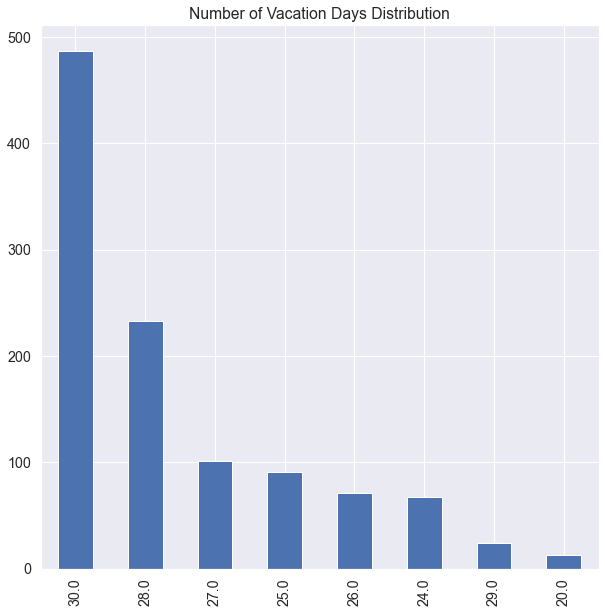

In [4584]:
valuesToPlot = df['Number of vacation days'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Number of Vacation Days Distribution')

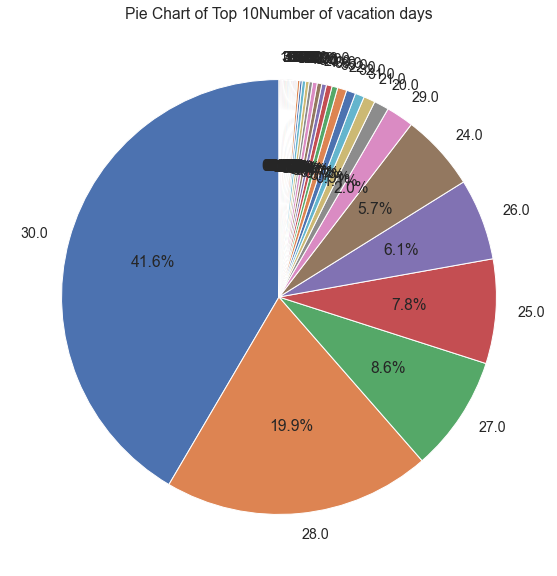

In [4585]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Number of vacation days'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10{}'.format(column_to_plot))

# Display the chart
plt.show()

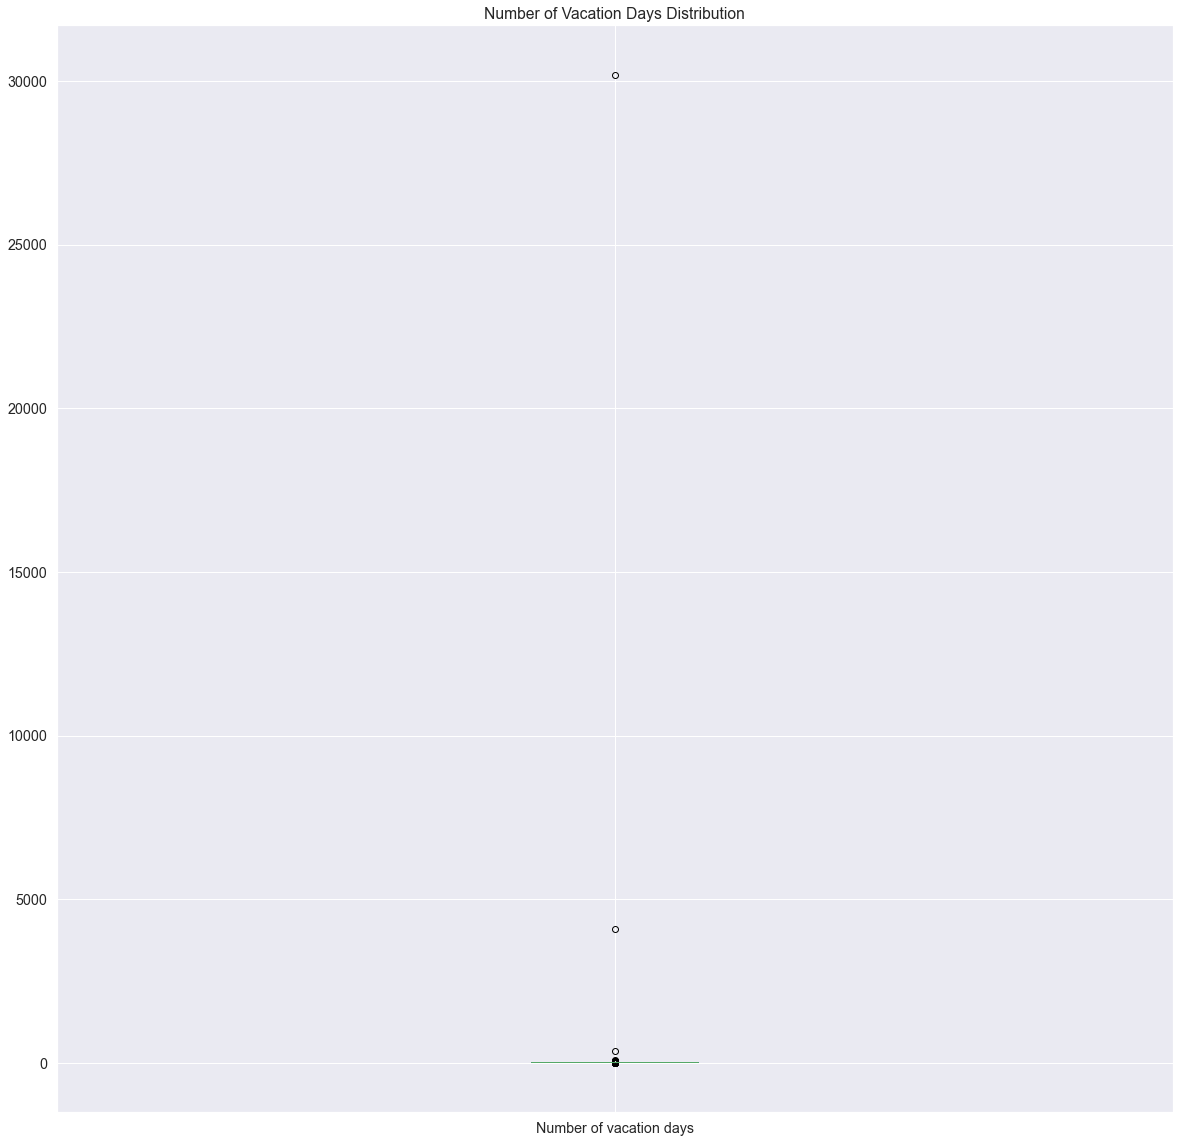

In [4586]:
valuesToPlot = df['Number of vacation days'].plot(kind='box', figsize=(20, 20), title='Number of Vacation Days Distribution')

<font size = "3"> Some outliers having really hig values so mean could not be used to replace these values as it would give errornous values </font>

<font size ="4"> Removing Outliers Using Tukey Test <font> 

In [4587]:
column_name = 'Number of vacation days'
data = df.copy()
q1 = data[column_name].quantile(0.25)
q3 = data[column_name].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr

data[column_name] = np.where(
    (df[column_name] < lower_fence) | (df[column_name] > upper_fence),
    np.nan,
    df[column_name]
)

In [4588]:
data.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     0
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

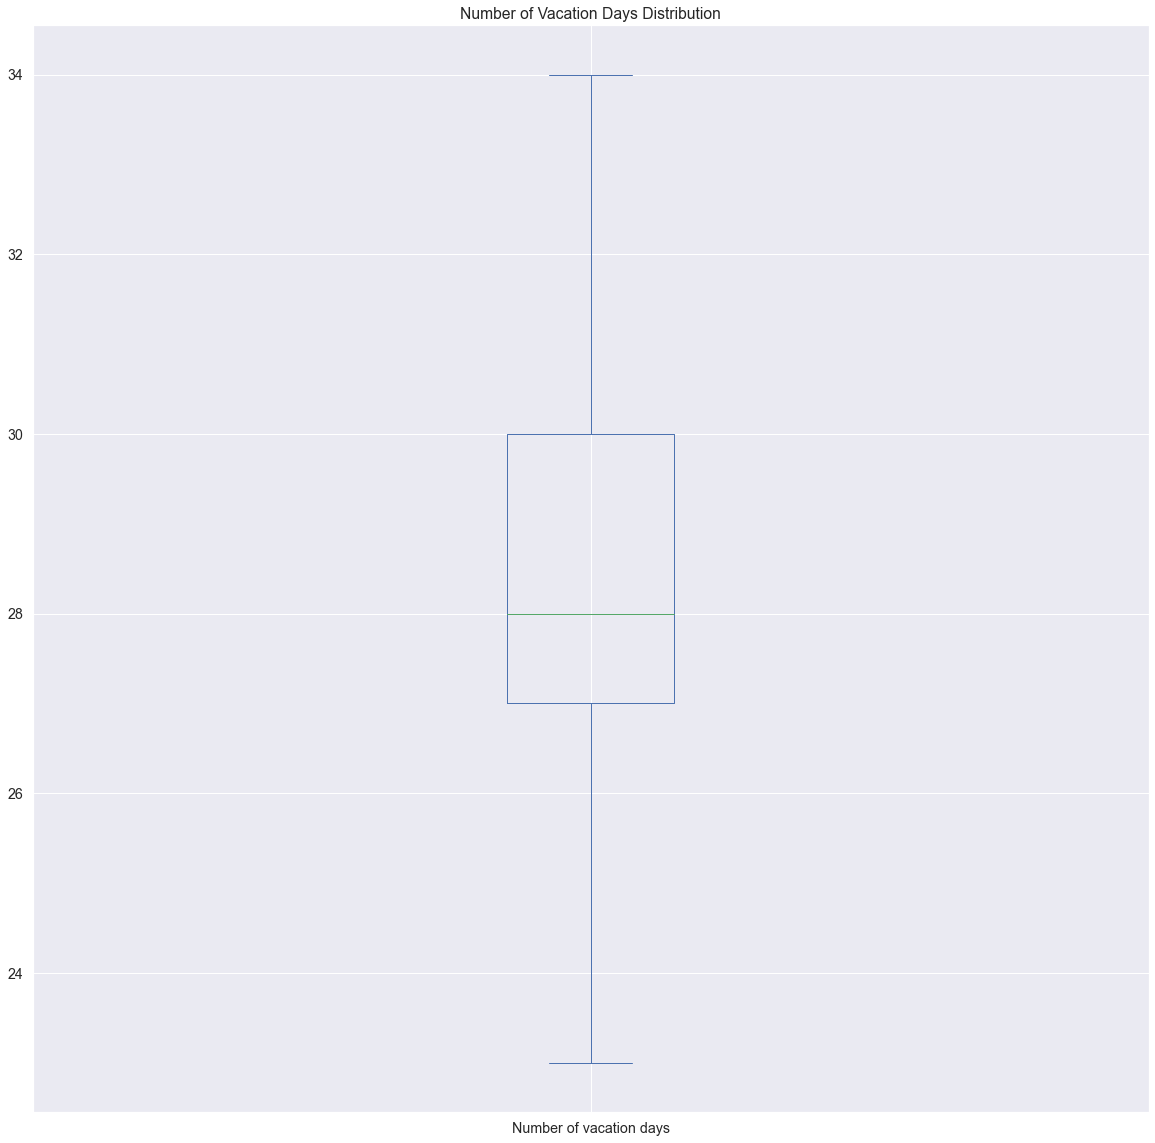

In [4589]:
valuesToPlot = data['Number of vacation days'].plot(kind='box', figsize=(20, 20), title='Number of Vacation Days Distribution')

<font size = "3">ukey test or any other test that us quartile range for removal of outlier could not be used as the number of missing columns increased from 77 to 151 which means some values that contain imporatant and valuable data has also been removed 

<font size ="4">Removal of Inocnsistent Values/Outliers using Logical Analysis

In [4590]:
df.loc[df['Number of vacation days'] > 365, 'Number of vacation days'] = None

In [4591]:
df[df['Number of vacation days'].isnull()]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Contract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
12,24/11/2020 11:18,32.0,Male,Berlin,Software Engineer,8.0,3.0,Lead,PHP,PHP,...,0.0,NaN,Full-time employee,Unlimited contract,English,1000+,NaN,0.0,0.0,1000
55,24/11/2020 11:33,32.0,Male,Berlin,Software Engineer,8.0,1.0,Senior,PHP,PHP,...,0.0,NaN,Full-time employee,NaN,English,NaN,NaN,0.0,0.0,0
68,24/11/2020 11:39,48.0,Male,London,Data Engineer,23.0,0.0,nan,Google Cloud Platform,"Python, SQL, Go, Google Cloud, bash",...,0.0,NaN,Company Director,Temporary contract,English,up to 10,Personal Ltd,1.0,0.0,0
130,24/11/2020 12:04,30.0,Male,Berlin,Software Engineer,10.0,5.0,Lead,Python,"Python, SQL",...,1000.0,NaN,Full-time employee,Unlimited contract,English,101-1000,Startup,0.0,30.0,0
167,24/11/2020 12:23,28.0,Male,Moldova,Backend Developer,4.0,0.0,Middle,Java,"Kotlin, Java / Scala",...,0.0,NaN,Full-time employee,NaN,English,51-100,Startup,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,14/12/2020 14:33,30.0,Female,Hamburg,Software Engineer,5.0,2.0,Senior,Java,Java,...,0.0,NaN,Full-time employee,Unlimited contract,English,1000+,Product,0.0,0.0,0
1162,14/12/2020 14:33,30.0,Female,Hamburg,Software Engineer,5.0,2.0,Senior,Java,Java,...,0.0,NaN,Full-time employee,Unlimited contract,English,1000+,Product,0.0,0.0,0
1232,8/1/2021 16:12,52.0,Male,Stuttgart,Software Engineer,8.0,3.0,Lead,Atlassian JIRA,"SQL, Perl",...,0.0,NaN,Self-employed (freelancer),Temporary contract,English,up to 10,Consulting / Agency,0.0,0.0,0
1243,16/01/2021 19:35,32.0,Female,Munich,QA Engineer,8.0,5.0,Senior,Java,Java / Scala,...,0.0,NaN,Full-time employee,NaN,German,Nov-50,Product,0.0,0.0,no


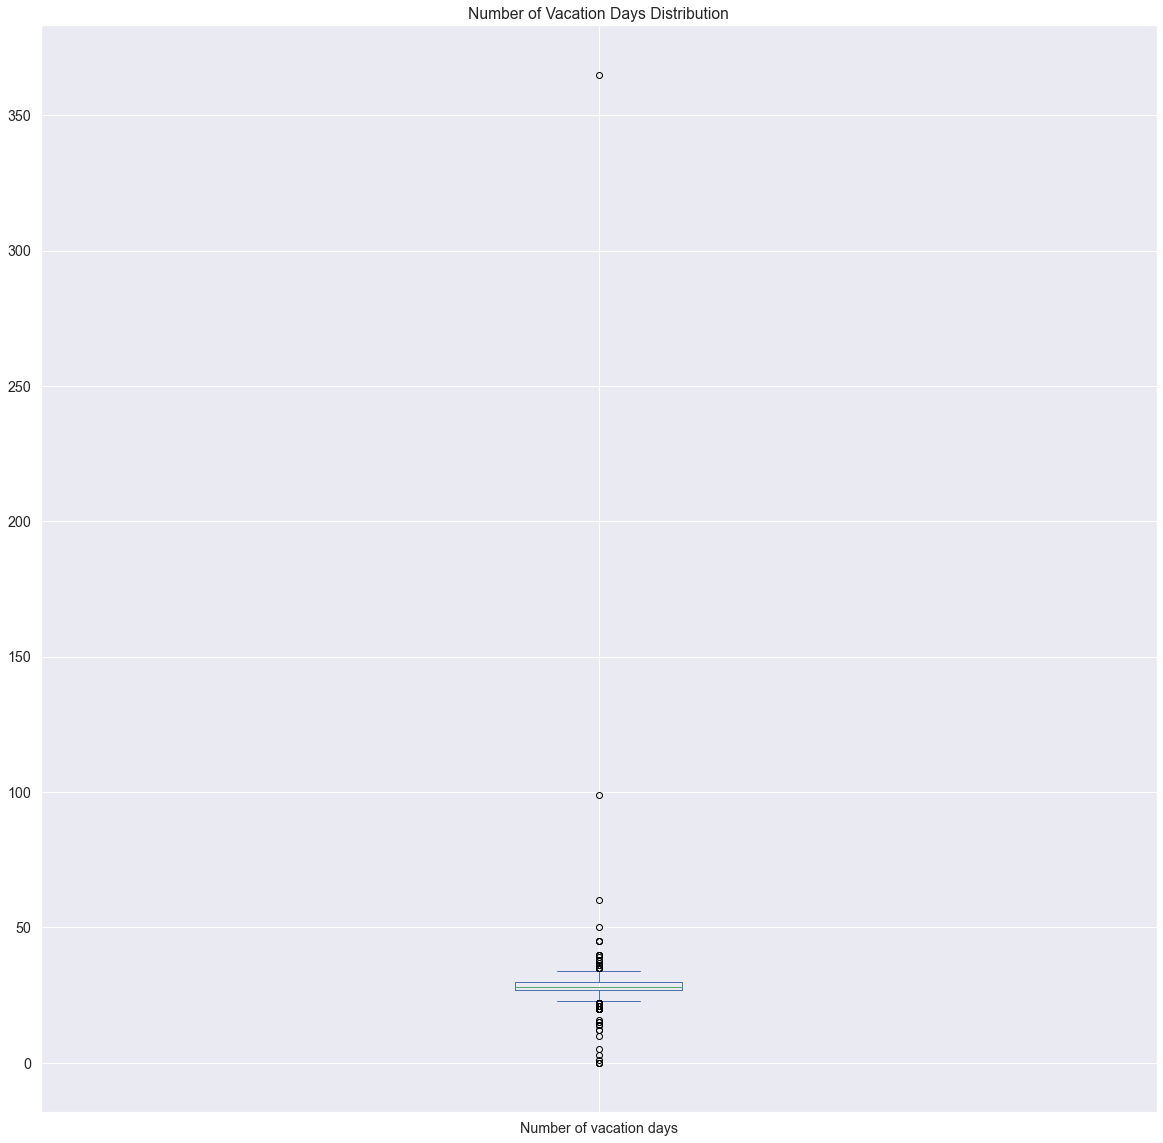

In [4592]:
valuesToPlot = df['Number of vacation days'].plot(kind='box', figsize=(20, 20), title='Number of Vacation Days Distribution')

<font size ="4">Applying Iterative Imputer </font>

In [4593]:
imp = IterativeImputer(max_iter=100, random_state=10,initial_strategy='median')

impute = ['Number of vacation days']
imp.fit(df[impute])

df[impute] = imp.transform(df[impute])

In [4594]:
df.isnull().sum()

Timestamp                                                                                                                   0
Age                                                                                                                         0
Gender                                                                                                                      0
City                                                                                                                        0
Position                                                                                                                    0
Total years of experience                                                                                                   0
Years of experience in Germany                                                                                              0
Seniority level                                                                                                       

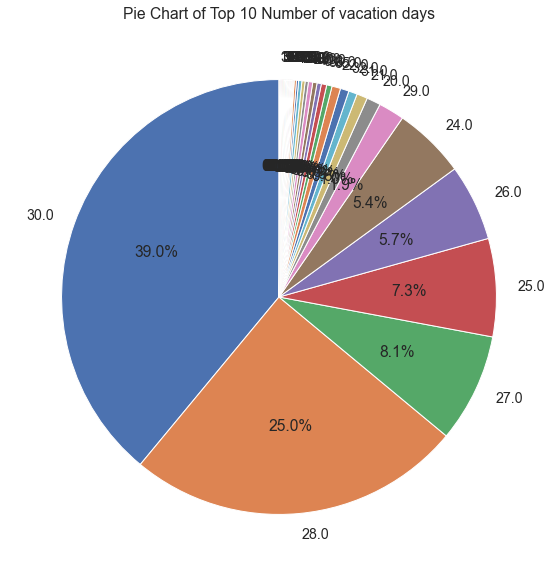

In [4595]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Number of vacation days'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3"> As the pie charts looks similar it is a prrof that the missing values have been imputed correctly </font>

### <b> Contract Duration </b>

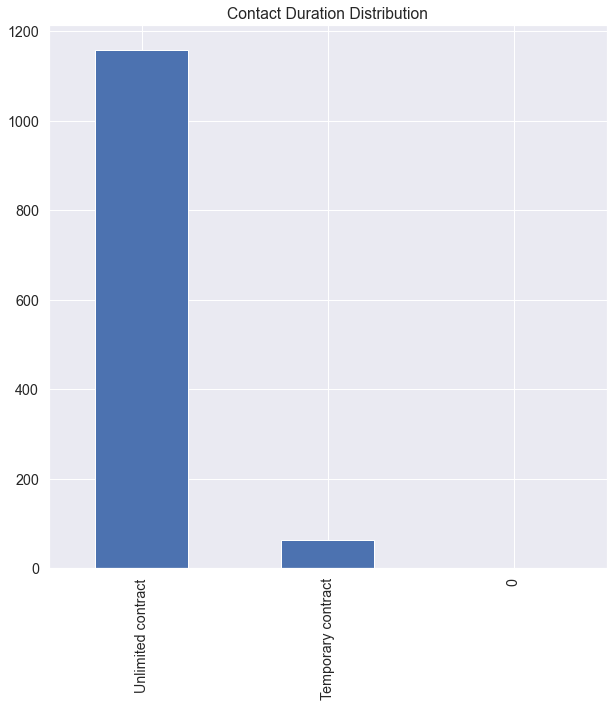

In [4596]:
valuesToPlot = df['Contract duration'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Contact Duration Distribution')

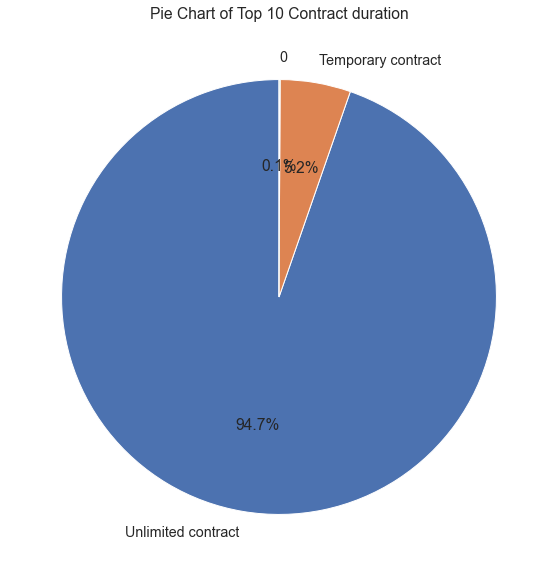

In [4597]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Contract duration'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

In [4598]:
df.isnull().sum()

Timestamp                                                                                                                   0
Age                                                                                                                         0
Gender                                                                                                                      0
City                                                                                                                        0
Position                                                                                                                    0
Total years of experience                                                                                                   0
Years of experience in Germany                                                                                              0
Seniority level                                                                                                       

<font size = "4"> Removing Inconsistent Data from Contact Duration </font>

In [4599]:
df['Contract duration'] = np.where((df['Contract duration'] != 'Unlimited contract') & (df['Contract duration'] != 'Temporary contract'), np.nan, df['Contract duration'])

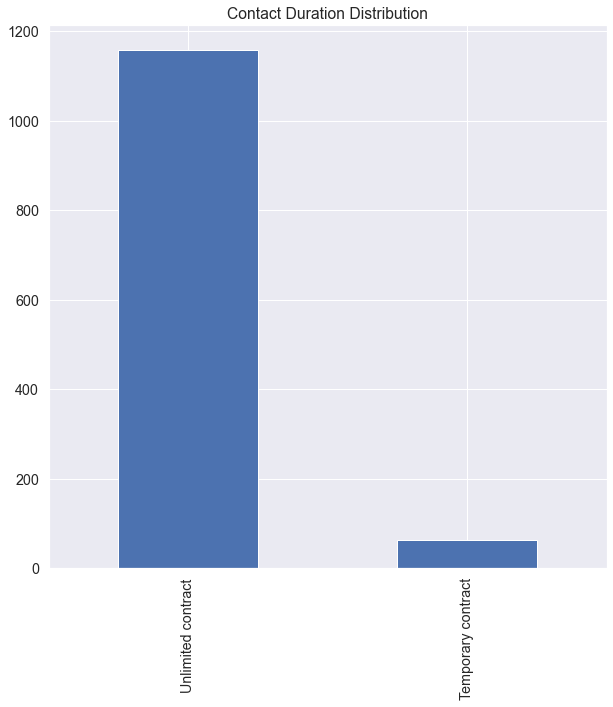

In [4600]:
valuesToPlot = df['Contract duration'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Contact Duration Distribution')

In [4601]:
df['Contract duration'].value_counts()

Unlimited contract    1157
Temporary contract      64
Name: Contract duration, dtype: int64

<font size = "3"> But as 'Contract duration' is highly co-related with 'Employment Status' so we will use 'KNN Imputation'<br>

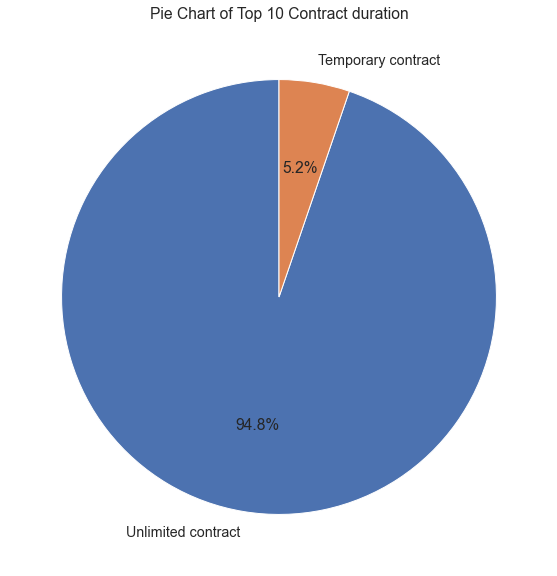

In [4602]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Contract duration'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size ="4">Bi-Variate Analysis of Contract Duration</font>

<font size = "4"> Applying KNN Imputation on Contract Duration </font>

In [4603]:
# Select Positon and all columns with 0 missing values
df_imputedNew = df[['Age','Gender','City','Total years of experience','Years of experience in Germany','Yearly brutto salary (without bonus and stocks) in EUR','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Position ','Seniority level','Number of vacation days','Employment status','Contract duration']]


# Encode categorical column as labels
le = LabelEncoder()
for col in df_imputedNew.columns:
    if df_imputedNew[col].dtype == 'object' and col != 'Contract duration':
        df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))

# Map contract duration
mapping = {'Unlimited contract': 0, 'Temporary contract': 1}
df_imputedNew['Contract duration'] = df_imputedNew['Contract duration'].map(mapping)

# Impute missing values using KNN and Round Off After Replacing Missing Values
imputer = KNNImputer(n_neighbors=200, weights='distance', metric='nan_euclidean')
imputed = imputer.fit_transform(df_imputedNew)
df_imputedNew = pd.DataFrame(imputed, columns=df_imputedNew.columns)
df_imputedNew['Contract duration'] = df_imputedNew['Contract duration'].round().astype(int)

# Reverse Mapping
reverse_mapping = {v: k for k, v in mapping.items()}
df_imputedNew['Contract duration'] = df_imputedNew['Contract duration'].map(reverse_mapping)

# Decoding categorical column
for col in df.columns:
    if df[col].dtype == 'object' and col in df_imputedNew.columns and col != 'Contract duration':
        categories = pd.unique(df[col].astype(str)).tolist()
        le.fit(categories)
        df_imputedNew[col] = le.inverse_transform(df_imputedNew[col].astype(int)).astype(str)


C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2172129274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\2172129274.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew['Contract duration'] = df_imputedNew['Contract duration'].map(mapping)


In [4604]:
df['Contract duration'] = df_imputedNew['Contract duration']

In [4605]:
df.isnull().sum()

Timestamp                                                                                                                   0
Age                                                                                                                         0
Gender                                                                                                                      0
City                                                                                                                        0
Position                                                                                                                    0
Total years of experience                                                                                                   0
Years of experience in Germany                                                                                              0
Seniority level                                                                                                       

In [4606]:
modeValue = df['Contract duration'].mode()[0]
df['Contract duration'].fillna(modeValue,inplace=True)

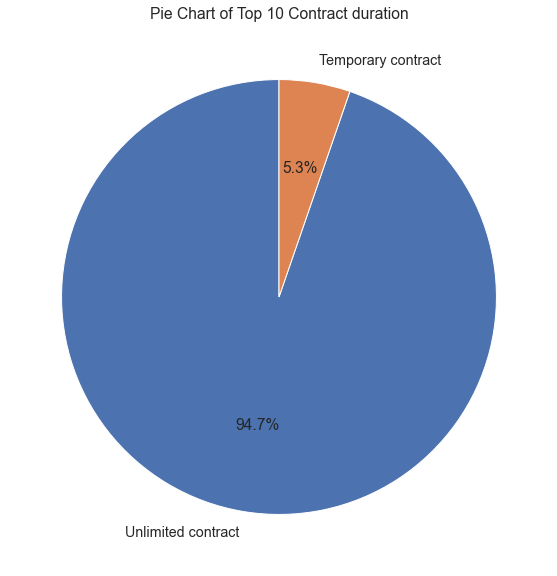

In [4607]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Contract duration'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

### <b> Main Language At Work </b>

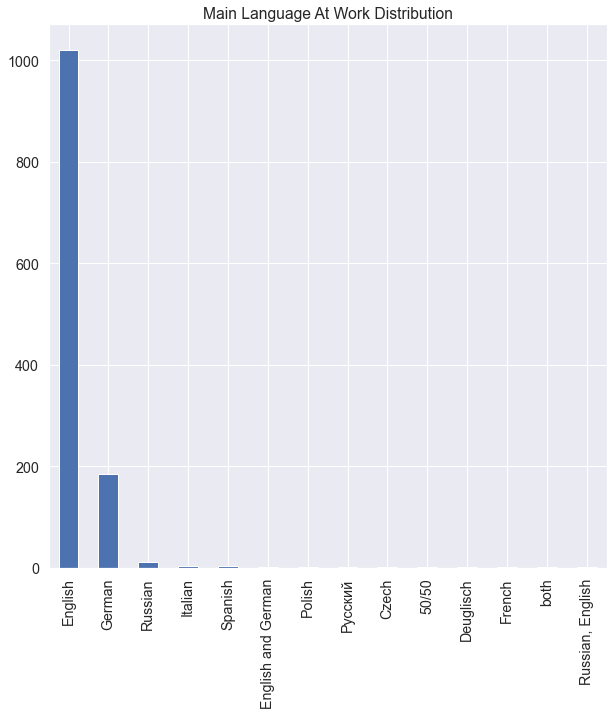

In [4608]:
valuesToPlot = df['Main language at work'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Main Language At Work Distribution')

<font size ="3">
- Most Frequent Language = English<br>
- Some Inconsistent Data
</font>

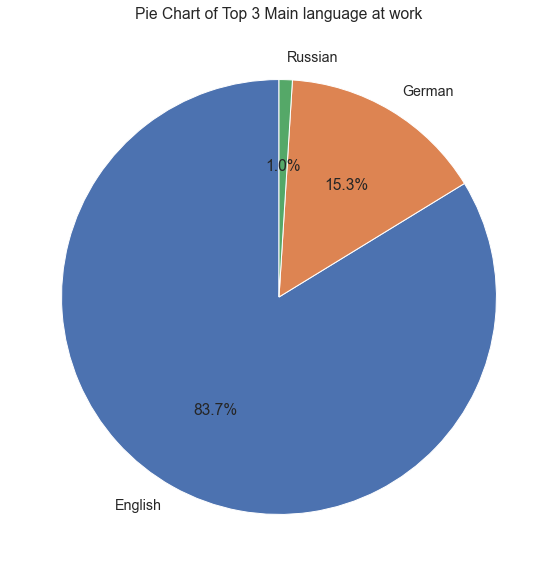

In [4609]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Main language at work'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:3]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 3 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "4">Removing Inconsistent Values from Main Language At Work</font>

In [4610]:
df['Main language at work'].unique()

array(['English', 'German', nan, 'English and German', 'Russian',
       'Polish', '50/50', 'Русский', 'Czech', 'Italian', 'Deuglisch',
       'French', 'both', 'Spanish', 'Russian, English'], dtype=object)

In [4611]:
df['Main language at work'] = df['Main language at work'].replace('50/50',np.nan)
df['Main language at work'] = df['Main language at work'].replace('Русский',np.nan)
df['Main language at work'] = df['Main language at work'].replace('Deuglisch',np.nan)
df['Main language at work'] = df['Main language at work'].replace('English and German',np.nan)
df['Main language at work'] = df['Main language at work'].replace('both',np.nan)
df['Main language at work'].isnull().sum()

19

In [4612]:
df.isnull().sum()

Timestamp                                                                                                                   0
Age                                                                                                                         0
Gender                                                                                                                      0
City                                                                                                                        0
Position                                                                                                                    0
Total years of experience                                                                                                   0
Years of experience in Germany                                                                                              0
Seniority level                                                                                                       

<font size = "4"> Applying KNN Imputation on Main Language At Work</font>

In [4613]:
# Select Main Language At Work and all columns with 0 missing values
df_imputedNew = df[['Age','Gender','City','Total years of experience','Years of experience in Germany','Yearly brutto salary (without bonus and stocks) in EUR','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Position ','Seniority level','Number of vacation days','Employment status','Contract duration','Main language at work']]
df_imputedNew.isnull().sum()

# Encode categorical column as labels
le = LabelEncoder()
for col in df_imputedNew.columns:
    if df_imputedNew[col].dtype == 'object' and col != 'Main language at work':
        df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))

# Get unique values and assign values
unique_values = df['Main language at work'].dropna().unique()
value_dict = {val: i for i, val in enumerate(unique_values)}
df_imputedNew['Main language at work'] = df_imputedNew['Main language at work'].map(value_dict)

# Impute missing values using KNN and Round Off After Replacing Missing Values
imputer = KNNImputer(n_neighbors=200, weights='distance', metric='nan_euclidean')
imputedNew = imputer.fit_transform(df_imputedNew)
df_imputedNew = pd.DataFrame(imputedNew, columns=df_imputedNew.columns)
df_imputedNew['Main language at work'] = df_imputedNew['Main language at work'].round().astype(int)
df_imputedNew['Main language at work'].unique()

# Reverse Mapping
reverse_mapping = {v: k for k, v in value_dict.items()}
df_imputedNew['Main language at work'] = df_imputedNew['Main language at work'].map(reverse_mapping)

# Decoding categorical column
for col in df.columns:
    if df[col].dtype == 'object' and col in df_imputedNew.columns and col != 'Main language at work':
        categories = pd.unique(df[col].astype(str)).tolist()
        le.fit(categories)
        df_imputedNew[col] = le.inverse_transform(df_imputedNew[col].astype(int)).astype(str)

df['Main language at work'] = df_imputedNew['Main language at work']


C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\3268052857.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\3268052857.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew['Main language at work'] = df_imputedNew['Main language at work'].map(value_dict)


In [4614]:
df.isnull().sum()

Timestamp                                                                                                                   0
Age                                                                                                                         0
Gender                                                                                                                      0
City                                                                                                                        0
Position                                                                                                                    0
Total years of experience                                                                                                   0
Years of experience in Germany                                                                                              0
Seniority level                                                                                                       

In [4615]:
modeValue = df['Main language at work'].mode()[0]
df['Main language at work'].fillna(modeValue,inplace=True)

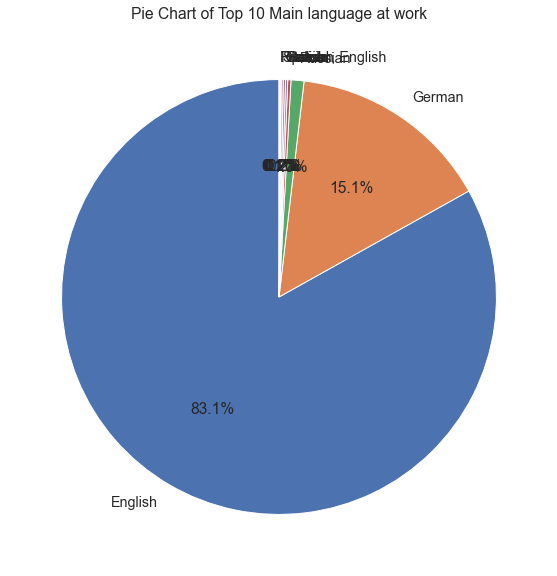

In [4616]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Main language at work'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 10 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3">
Percentage distrribution of column is still similar to percentage distribution before missing values were replaced with other values so imputation of missing values is still correct.
</font>

### <b> Company Size </b>

<font size = "4"> Univariate Analysis </font>

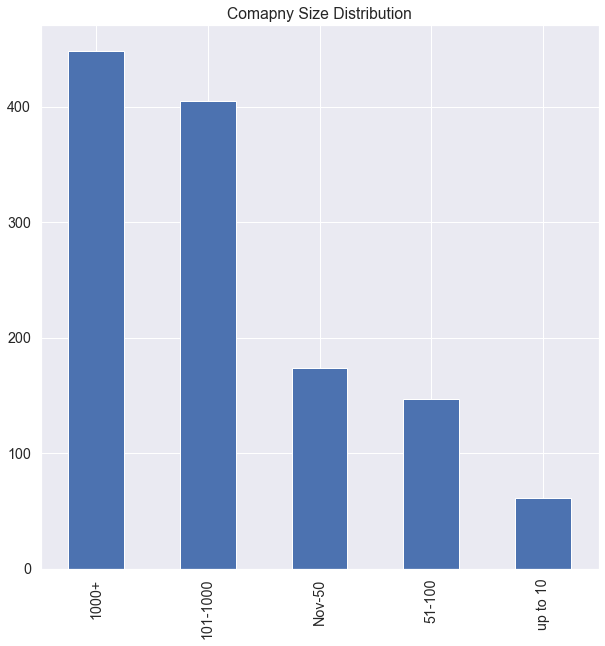

In [4617]:
valuesToPlot = df['Company size'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Comapny Size Distribution')

<font size = "4"> Replacing Inconsistent Values from Main Language At Work</font>

In [4618]:
df['Company size'] = df['Company size'].replace('Nov-50','11-50')

In [4619]:
df['Company size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: Company size, dtype: int64

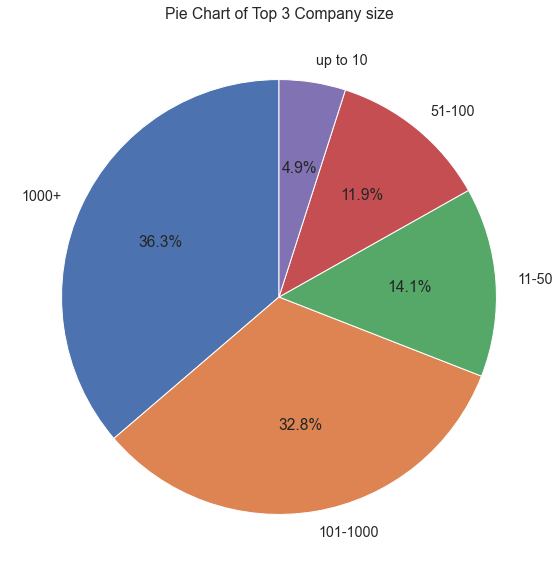

In [4620]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Company size'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 3 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3">
All values are mostly equally seprated, so mode could not be applied. Moreover, as this column is strongly co-related with other columns so we will apply KNN Imputation to impute those missing values. 
</font>

<font size = "4">Bi-Variate Analysis of Company Size </font>

<font size = "4"> Applying KNN Imputation on Company Size</font>

In [4621]:
# Select Main Language At Work and all columns with 0 missing values
df_imputedNew = df[['Age','Gender','City','Total years of experience','Years of experience in Germany','Yearly brutto salary (without bonus and stocks) in EUR','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Position ','Seniority level','Number of vacation days','Employment status','Contract duration','Main language at work','Company size']]
df_imputedNew.isnull().sum()

# Encode categorical column as labels
le = LabelEncoder()
for col in df_imputedNew.columns:
    if df_imputedNew[col].dtype == 'object' and col != 'Company size':
        df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))

# Get unique values and assign values
unique_values = df['Company size'].dropna().unique()
value_dict = {val: i for i, val in enumerate(unique_values)}
df_imputedNew['Company size'] = df_imputedNew['Company size'].map(value_dict)

# Impute missing values using KNN and Round Off After Replacing Missing Values
imputer = KNNImputer(n_neighbors=400, weights='distance', metric='nan_euclidean')
imputedNew = imputer.fit_transform(df_imputedNew)
df_imputedNew = pd.DataFrame(imputedNew, columns=df_imputedNew.columns)
df_imputedNew['Company size'] = df_imputedNew['Company size'].round().astype(int)

# Reverse Mapping
reverse_mapping = {v: k for k, v in value_dict.items()}
df_imputedNew['Company size'] = df_imputedNew['Company size'].map(reverse_mapping)
df_imputedNew['Company size'].value_counts()

# Decoding categorical column
for col in df.columns:
    if df[col].dtype == 'object' and col in df_imputedNew.columns and col != 'Company size':
        categories = pd.unique(df[col].astype(str)).tolist()
        le.fit(categories)
        df_imputedNew[col] = le.inverse_transform(df_imputedNew[col].astype(int)).astype(str)

df_imputedNew['Company size'].value_counts()

df['Company size'] = df_imputedNew['Company size']



C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\1546360901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\1546360901.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew['Company size'] = df_imputedNew['Company size'].map(value_dict)


In [4622]:
modeValue = df['Company size'].mode()[0]
df['Company size'].fillna(modeValue,inplace=True)

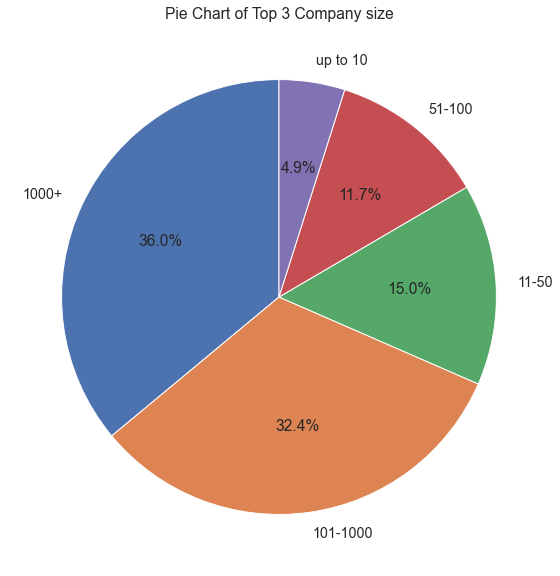

In [4623]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Company size'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 3 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3">
Percentage distrribution of column is still similar to percentage distribution before missing values were replaced with other values so imputation of missing values is still correct.
</font>

### <b> Company Type </b>

<font size = "4"> Univariate Analysis of Company Type </font>

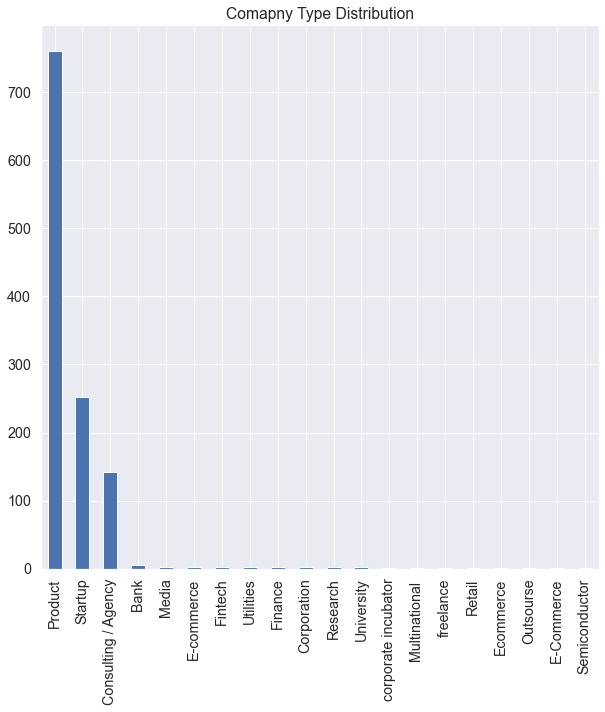

In [4624]:
valuesToPlot = df['Company type'].value_counts()[:20].plot(kind='bar', figsize=(10, 10), title='Comapny Type Distribution')

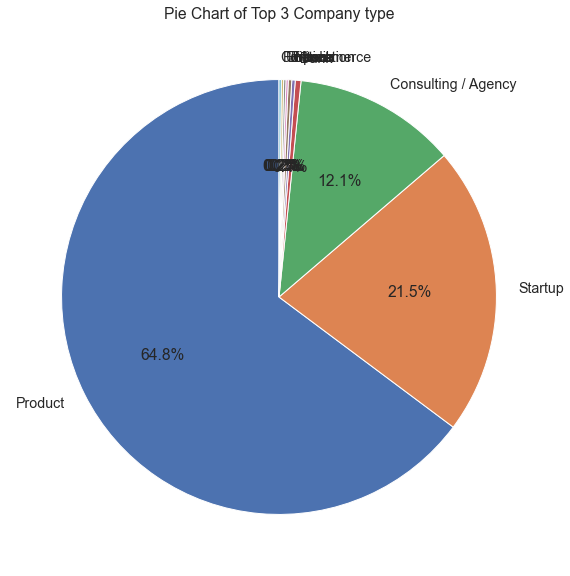

In [4625]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Company type'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 3 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3"> Applying KNN Imputation from Company Type</font>

In [4626]:
# Select Main Language At Work and all columns with 0 missing values
df_imputedNew = df[['Age','Gender','City','Total years of experience','Years of experience in Germany','Yearly brutto salary (without bonus and stocks) in EUR','Yearly bonus + stocks in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Position ','Seniority level','Number of vacation days','Employment status','Contract duration','Main language at work','Company size','Company type']]
df_imputedNew.isnull().sum()

# Encode categorical column as labels
le = LabelEncoder()
for col in df_imputedNew.columns:
    if df_imputedNew[col].dtype == 'object' and col != 'Company type':
        df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))

# Get unique values and assign values
unique_values = df['Company type'].dropna().unique()
value_dict = {val: i for i, val in enumerate(unique_values)}
df_imputedNew['Company type'] = df_imputedNew['Company type'].map(value_dict)

# Impute missing values using KNN and Round Off After Replacing Missing Values
imputer = KNNImputer(n_neighbors=400, weights='distance', metric='nan_euclidean')
imputedNew = imputer.fit_transform(df_imputedNew)
df_imputedNew = pd.DataFrame(imputedNew, columns=df_imputedNew.columns)
df_imputedNew['Company type'] = df_imputedNew['Company type'].round().astype(int)

# Reverse Mapping
reverse_mapping = {v: k for k, v in value_dict.items()}
df_imputedNew['Company type'] = df_imputedNew['Company type'].map(reverse_mapping)
df_imputedNew['Company type'].value_counts()

# Decoding categorical column
for col in df.columns:
    if df[col].dtype == 'object' and col in df_imputedNew.columns and col != 'Company type':
        categories = pd.unique(df[col].astype(str)).tolist()
        le.fit(categories)
        df_imputedNew[col] = le.inverse_transform(df_imputedNew[col].astype(int)).astype(str)

df_imputedNew['Company type'].value_counts()

df['Company type'] = df_imputedNew['Company type']

C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\263440148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew[col] = le.fit_transform(df_imputedNew[col].astype(str))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5136\263440148.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputedNew['Company type'] = df_imputedNew['Company type'].map(value_dict)


In [4627]:
df.isnull().sum()

Timestamp                                                                                                                  0
Age                                                                                                                        0
Gender                                                                                                                     0
City                                                                                                                       0
Position                                                                                                                   0
Total years of experience                                                                                                  0
Years of experience in Germany                                                                                             0
Seniority level                                                                                                            0


In [4628]:
modeValue = df['Company type'].mode()[0]
df['Company type'].fillna(modeValue,inplace=True)

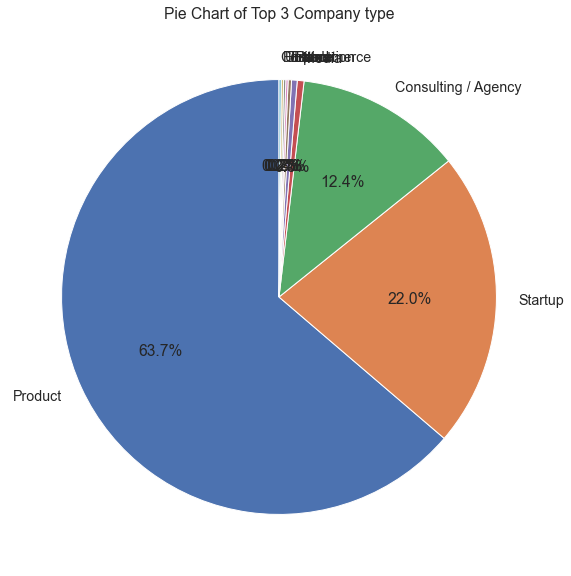

In [4629]:
# Select the column you want to plot as a pie chart
column_to_plot = 'Company type'

# Calculate the frequency of each category in the selected column
category_counts = df[column_to_plot].value_counts()[:10]

# Create a pie chart using matplotlib
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%', shadow=False, startangle=90)

# Add a title to the chart
plt.title('Pie Chart of Top 3 {}'.format(column_to_plot))

# Display the chart
plt.show()

<font size = "3">
Percentage distrribution of column is still similar to percentage distribution before missing values were replaced with other values so imputation of missing values is still correct.
</font>

### <b> Finalized Execel Sheet </b>

In [4630]:
df.to_csv('Finalized Clean Data2.csv')

### <b> API </b>

<font size = "4">Main</font>

In [4631]:
df = pd.read_csv("IT Salary Survey EU  2020.csv")

def convert_to_float(df, columns):   
    for index, row in df.iterrows():
        for col in columns:
            # attempt to convert the values in the column to float
            try:
                row[col] = float(row[col])
            except ValueError:
                # if there are any non-float values, set them to NaN
                row[col] = np.nan

        df.loc[index] = row  # type: ignore

    # convert the specified columns to float
    for col in columns:
        df[col] = df[col].astype(float)

    return df

def  preprocess_data(df):
    df['Yearly brutto salary (without bonus and stocks) in EUR'] = df['Yearly brutto salary (without bonus and stocks) in EUR'].fillna(df['Yearly brutto salary (without bonus and stocks) in EUR'].median())
    df['Yearly bonus + stocks in EUR'] = df['Yearly bonus + stocks in EUR'].fillna(0)
    df['Annual bonus+stocks one year ago. Only answer if staying in same country'] = df['Annual bonus+stocks one year ago. Only answer if staying in same country'].fillna(0)
    df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'] = df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].fillna(0)
    df['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'] = df['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'].fillna(0)
    col1 = 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
    col2 = 'Annual bonus+stocks one year ago. Only answer if staying in same country'
    median = df[col1].median()
    df.loc[df[col2].isnull(),col1] = median
    df[col1] = df[col1].fillna(0)
    df[col2] = df[col2].fillna(0)
    column = ['Have you lost your job due to the coronavirus outbreak?']
    for index, row in df.iterrows():
        for col in column:
            if row[col] =="Yes":
                df.loc[index,col] = 1 # type: ignore
            elif row[col] == 'No':
                df.loc[index,col] = 0 # type: ignore
            else:
                df.loc[index,col] = np.nan # type: ignore

    df['Have you lost your job due to the coronavirus outbreak?'] = df['Have you lost your job due to the coronavirus outbreak?'].fillna(df['Have you lost your job due to the coronavirus outbreak?'].median())
    return df


def preprocess_data(df):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include='category').columns.tolist()

     # Fill missing values for numeric columns with median
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())

    # Fill missing values for categorical columns with mode if it represents more than 80% of the data
    for col in categorical_cols:
        mode_value_counts = df[col].mode().value_counts(normalize=True)
        if len(mode_value_counts) > 0 and mode_value_counts.iloc[0] > 0.8:
            df[col] = df[col].fillna(df[col].mode()[0])

    # Convert categorical columns to numerical values
    for col in categorical_cols:
        df[col] = pd.Categorical(df[col])
        df[col] = df[col].cat.codes

    return df


def remove_outliers(df, m=2):
    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column]
        median = np.median(data)
        median_absolute_deviation = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / median_absolute_deviation
        df[column] = np.where(np.abs(modified_z_scores) < m, data, np.nan)
    return df

remove_outliers(df, m=3)
preprocess_data(df)
df = convert_to_float(df, ['Total years of experience', 'Years of experience in Germany', 'Yearly bonus + stocks in EUR', 'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Number of vacation days'])

c:\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
